<a href="https://colab.research.google.com/github/frarusso99/predicting-profitability-retail-transactions/blob/main/Predicting_Profitability_in_Retail_Transactions_(Superstore_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Profitability Prediction

This project aims to develop a reliable regression model to predict transaction `Profit` from the Superstore dataset.
The analysis focuses on addressing key challenges such as extreme outliers and complex non-linear relationships (e.g., the effect of discounts)., with the goal of improving the understanding of profitability drivers.

Several regression models will be tested and optimized to evaluate their predictive performance and interpretability.
The resulting model can support data-driven business strategies and decision-making.

# Setup

In [81]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [82]:
!pip install "numpy<2.0"

In [83]:
!pip install flaml[automl]


In [84]:
# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'superstore-dataset-final' dataset.
Path to dataset files: /kaggle/input/superstore-dataset-final


In [85]:
# List all files in the directory
extracted_files = os.listdir(path)
print("Extracted files:", extracted_files)

Extracted files: ['Sample - Superstore.csv']


# Data Loading

In [86]:
csv_path = os.path.join(path, "Sample - Superstore.csv")

df = pd.read_csv(csv_path, encoding='cp1252')

# Data Understanding

In [87]:
print(f"\nShape of dataset: {df.shape[0]} rows, {df.shape[1]} columns\n")

df.head()


Shape of dataset: 9994 rows, 21 columns



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Profiling

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Feature Semantics

The dataset contains comprehensive information about each retail transaction, including categorical, temporal, and financial details.

- **Row ID**: Unique identifier for each observation/row.
- **Order ID**: Unique identifier for the customer order.
- **Order Date**: Date when the product was ordered.
- **Ship Date**: Date when the product was shipped.
- **Ship Mode**: Shipping method chosen by the customer (e.g., Second Class, Standard Class).
- **Customer ID**: Unique identifier for each customer.
- **Customer Name**: Full name of the customer.
- **Segment**: Customer market segment (e.g., Consumer, Corporate).
- **Country**: Country of residence.
- **City**: City of the customer's residence.
- **State**: State of the customer's residence.
- **Postal Code**: Zip code of the customer.
- **Region**: Geographical region (e.g., East, West).
- **Product ID**: Unique identifier for the product item.
- **Category**: High-level product category (e.g., Furniture, Technology).
- **Sub-Category**: Detailed product category.
- **Product Name**: Specific name of the product.
- **Sales**: The total selling price of the product(s).
- **Quantity**: The number of units ordered.
- **Discount**: The discount applied to the product (as a decimal between 0 and 1).
- **Profit**: The profit or loss incurred on the transaction.

# Data Distribution

In [89]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Exploration

In [90]:
# Cardinality of main categorical variables
for col in ['Category','Sub-Category','Segment','Region','State','City','Ship Mode', 'Discount']:
    print(col, df[col].nunique())

Category 3
Sub-Category 17
Segment 3
Region 4
State 49
City 531
Ship Mode 4
Discount 12


In [91]:
# Distribution of rows by Region/Category
print(df['Region'].value_counts().to_frame('rows_by_region'))
print(df['Category'].value_counts().to_frame('rows_by_category'))

         rows_by_region
Region                 
West               3203
East               2848
Central            2323
South              1620
                 rows_by_category
Category                         
Office Supplies              6026
Furniture                    2121
Technology                   1847


In [92]:
# TimeStamp creation & Year_Month_Day extraction
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date']  = pd.to_datetime(df['Ship Date'])
df['OrderYear']  = df['Order Date'].dt.year
df['OrderMonth'] = df['Order Date'].dt.to_period('M').astype(str)
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

`Shipping Days`: The number of days between the order and shipment



In [93]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderYear,OrderMonth,Shipping Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-11,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-11,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016-06,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-10,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015-10,7


In [94]:
num_cols = ['Sales','Quantity','Discount','Profit','Shipping Days']
display(df[num_cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

,Sales,Quantity,Discount,Profit,Shipping Days
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,3.958175
std,623.245101,2.225110,0.206452,234.260108,1.747567
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
1%,2.286000,1.000000,0.000000,-319.264953,0.000000
5%,4.980000,1.000000,0.000000,-53.030920,0.000000
25%,17.280000,2.000000,0.000000,1.728750,3.000000
50%,54.490000,3.000000,0.200000,8.666500,4.000000
75%,209.940000,5.000000,0.200000,29.364000,5.000000
95%,956.984245,8.000000,0.700000,168.470400,7.000000


### Correlation Analysis (Heatmap)

We now examine the linear correlation between the main numerical variables in our dataset. This helps identify two key aspects: (1) multicollinearity between features, and (2) linear relationships with the target variable, `Profit`. Note that this matrix captures only linear dependencies — non-linear patterns, such as the impact of `Discount` on `Profit`, may require separate visual or model-based analysis.


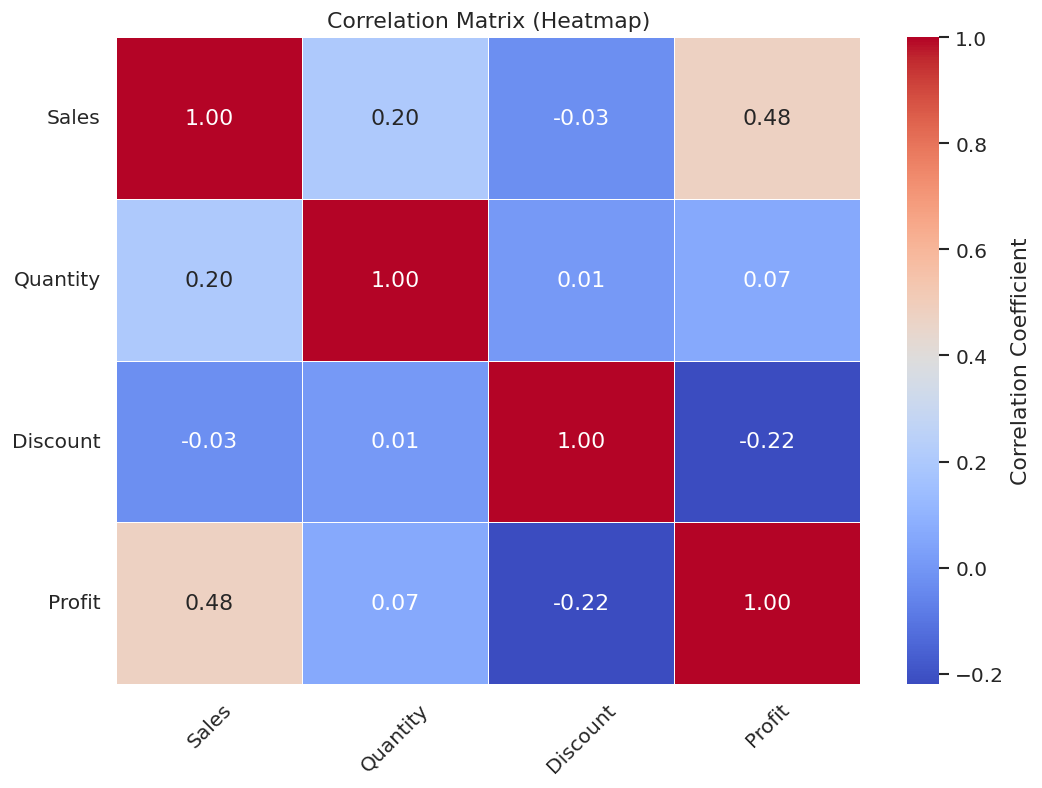

In [95]:
numeric_cols_corr = ['Sales', 'Quantity', 'Discount', 'Profit']
corr_matrix = df[numeric_cols_corr].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}  # Etichetta della barra dei colori
)
plt.title('Correlation Matrix (Heatmap)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.savefig('correlation_heatmap.png')
plt.show()


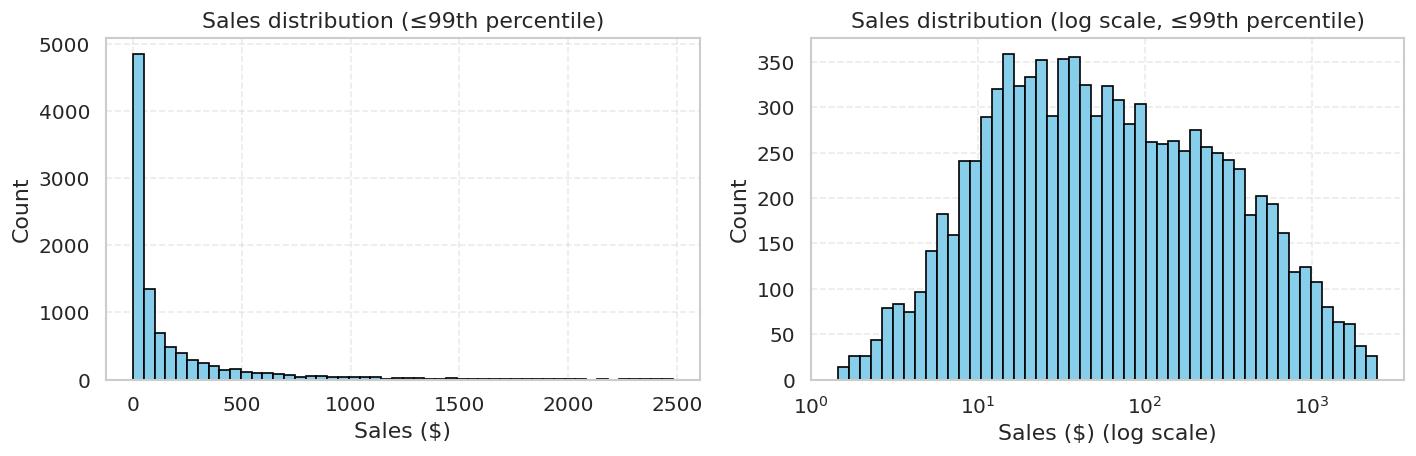

In [96]:
sales_data = df[df['Sales'] <= df['Sales'].quantile(0.99)]['Sales']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Normal histogram
axes[0].hist(sales_data, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title("Sales distribution (≤99th percentile)")
axes[0].set_xlabel("Sales ($)")
axes[0].set_ylabel("Count")
axes[0].grid(True, linestyle='--', alpha=0.4)

# Logarithmic histogram
bins_log = np.logspace(np.log10(sales_data.min()+1), np.log10(sales_data.max()), 50)
axes[1].hist(sales_data, bins=bins_log, color='skyblue', edgecolor='black')
axes[1].set_xscale('log')
axes[1].set_title("Sales distribution (log scale, ≤99th percentile)")
axes[1].set_xlabel("Sales ($) (log scale)")
axes[1].set_ylabel("Count")
axes[1].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


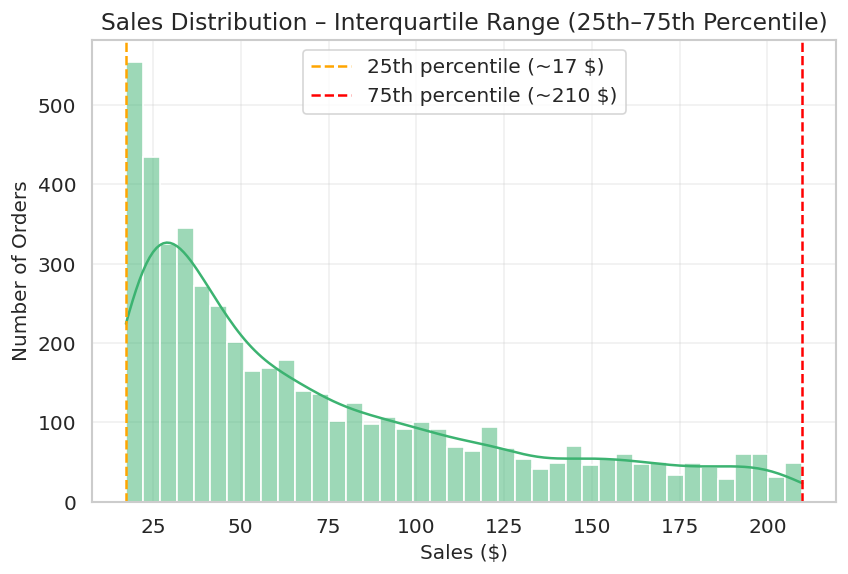

In [97]:
# Central range,  typical sales behavior
# Calculation of quartiles
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)

df_iqr = df[(df['Sales'] >= q1) & (df['Sales'] <= q3)]

plt.figure(figsize=(8,5))
sns.histplot(df_iqr['Sales'], bins=40, kde=True, color='mediumseagreen')
plt.title('Sales Distribution – Interquartile Range (25th–75th Percentile)', fontsize=14)
plt.xlabel('Sales ($)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(alpha=0.3)

plt.axvline(q1, color='orange', linestyle='--', label=f'25th percentile (~{q1:.0f} $)')
plt.axvline(q3, color='red', linestyle='--', label=f'75th percentile (~{q3:.0f} $)')

plt.legend()
plt.show()

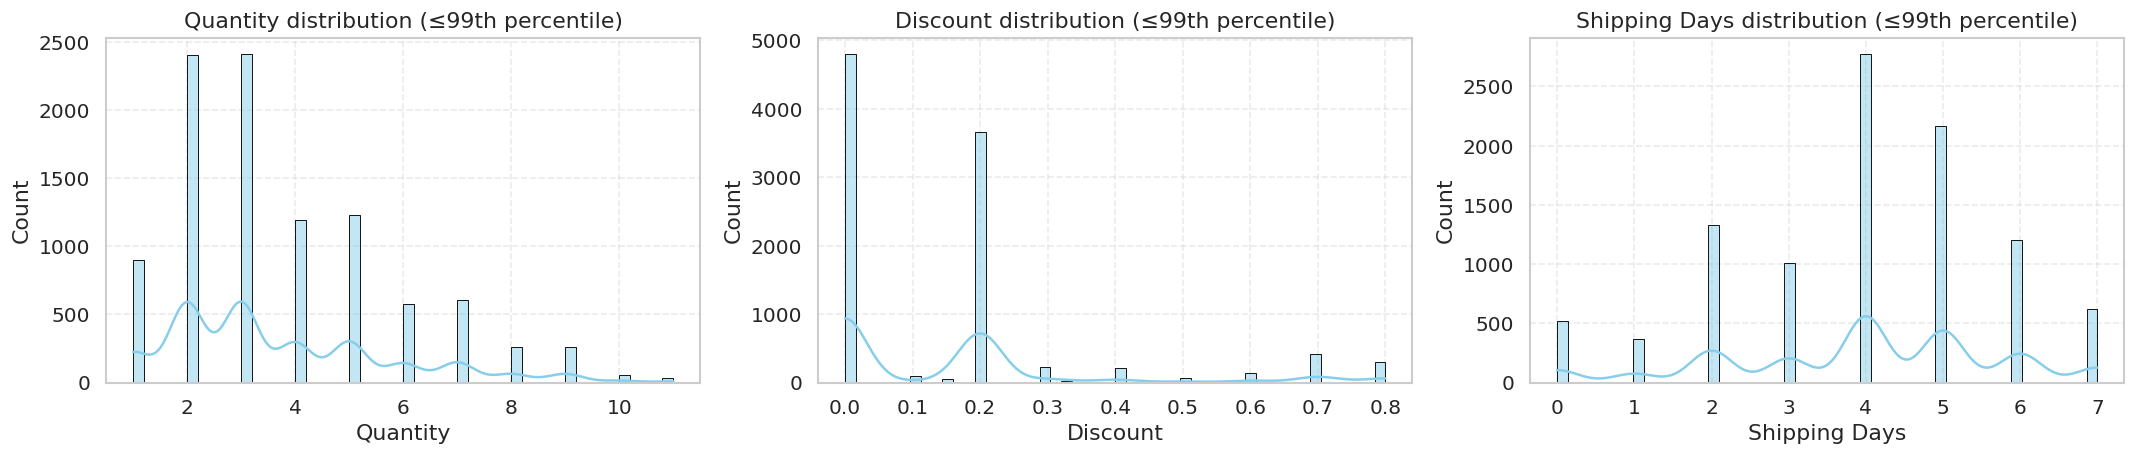

In [98]:
cols = ['Quantity', 'Discount', 'Shipping Days']
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for i, c in enumerate(cols):
    data = df[df[c] <= df[c].quantile(0.99)][c]
    sns.histplot(data, bins=50, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f"{c} distribution (≤99th percentile)")
    axes[i].set_xlabel(c)
    axes[i].set_ylabel("Count")
    axes[i].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


# Target: `Profit`

In [99]:
total_profit = df['Profit'].sum()
print(total_profit)


286397.0217


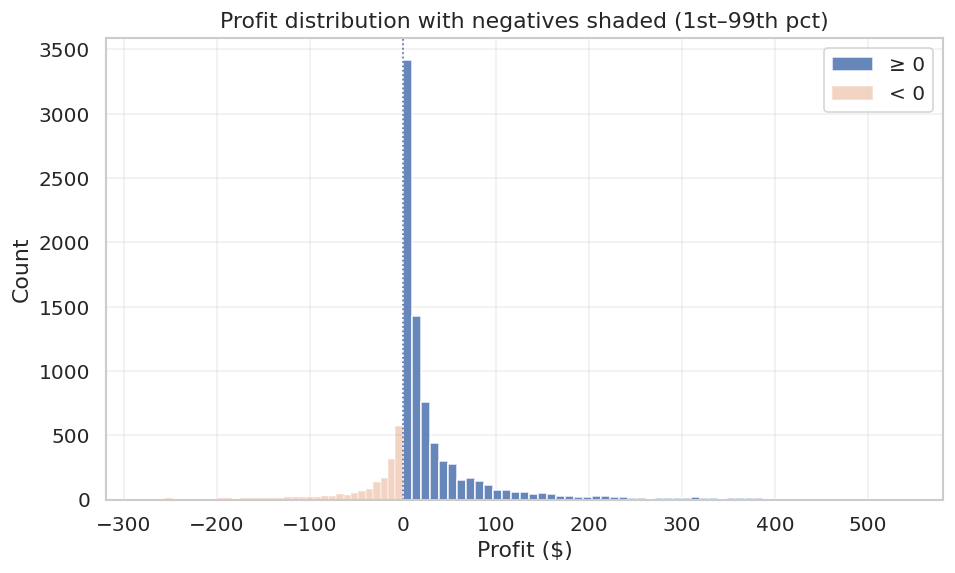

In [100]:
p01 = df['Profit'].quantile(0.01)
p99 = df['Profit'].quantile(0.99)

plt.figure(figsize=(9,5))
# Positive
plt.hist(df.loc[(df['Profit']>=0) & (df['Profit']<=p99), 'Profit'],
         bins=60, alpha=0.85, label='≥ 0')
# Negative
plt.hist(df.loc[(df['Profit']<0) & (df['Profit']>=p01), 'Profit'],
         bins=40, alpha=0.35, label='< 0')
plt.title('Profit distribution with negatives shaded (1st–99th pct)')
plt.xlabel('Profit ($)'); plt.ylabel('Count')
plt.axvline(0, linestyle=':', linewidth=1)
plt.xlim(p01, p99)  # ma la densità visiva è a destra
plt.legend(); plt.grid(alpha=0.3)
plt.show()


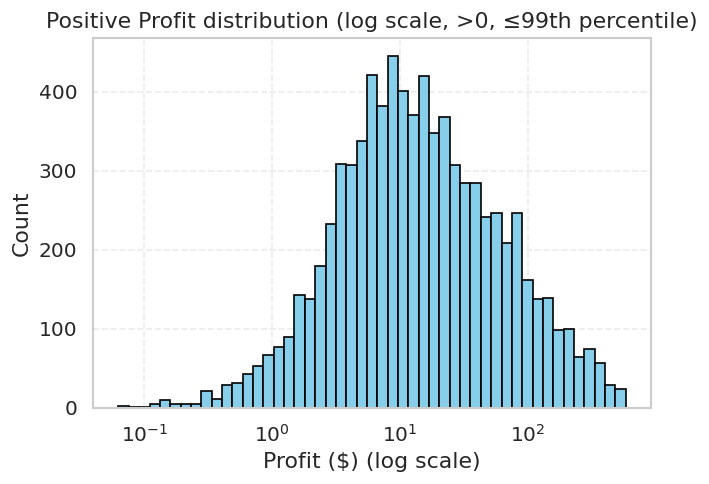

In [101]:
profit_data = df[df['Profit'] <= df['Profit'].quantile(0.99)]['Profit']
profit_pos = profit_data[profit_data > 0]

plt.figure(figsize=(6, 4))
bins_log = np.logspace(np.log10(profit_pos.min()), np.log10(profit_pos.max()), 50)
plt.hist(profit_pos, bins=bins_log, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title("Positive Profit distribution (log scale, >0, ≤99th percentile)")
plt.xlabel("Profit ($) (log scale)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


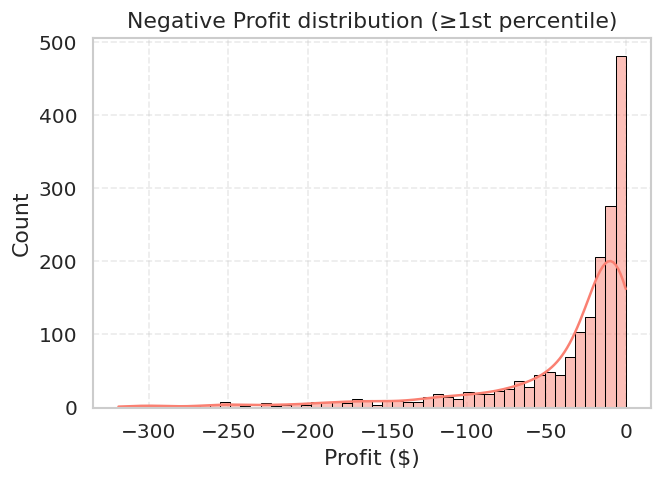

In [102]:
profit_neg = df[df['Profit'] < 0]['Profit']
lower_bound = df['Profit'].quantile(0.01)
profit_neg_filtered = profit_neg[profit_neg >= lower_bound]

plt.figure(figsize=(6, 4))
sns.histplot(profit_neg_filtered, bins=50, kde=True, color='salmon', edgecolor='black')
plt.title("Negative Profit distribution (≥1st percentile)")
plt.xlabel("Profit ($)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


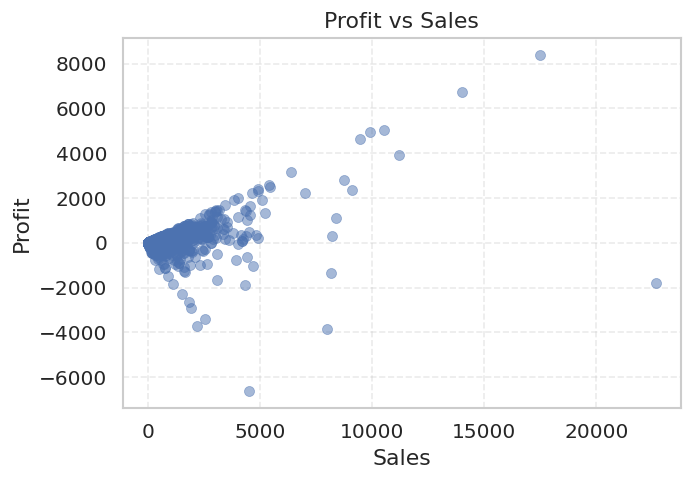

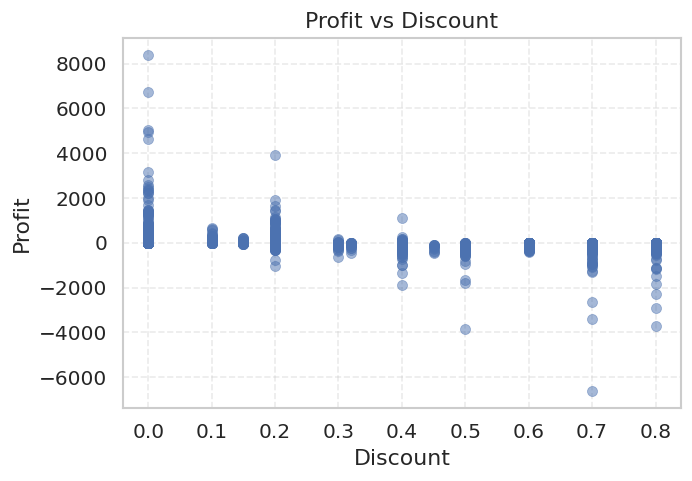

Profit–Sales correlation: 0.479
Profit–Discount correlation: -0.219


In [103]:
import scipy.stats as stats

# Scatter plot Profit vs Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Sales', y='Profit', alpha=0.5, edgecolor=None)
plt.title("Profit vs Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Scatter plot Profit vs Discount
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5, edgecolor=None)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Numerical correlation
corr_sales = df[['Sales', 'Profit']].corr().iloc[0,1]
corr_discount = df[['Discount', 'Profit']].corr().iloc[0,1]

print(f"Profit–Sales correlation: {corr_sales:.3f}")
print(f"Profit–Discount correlation: {corr_discount:.3f}")


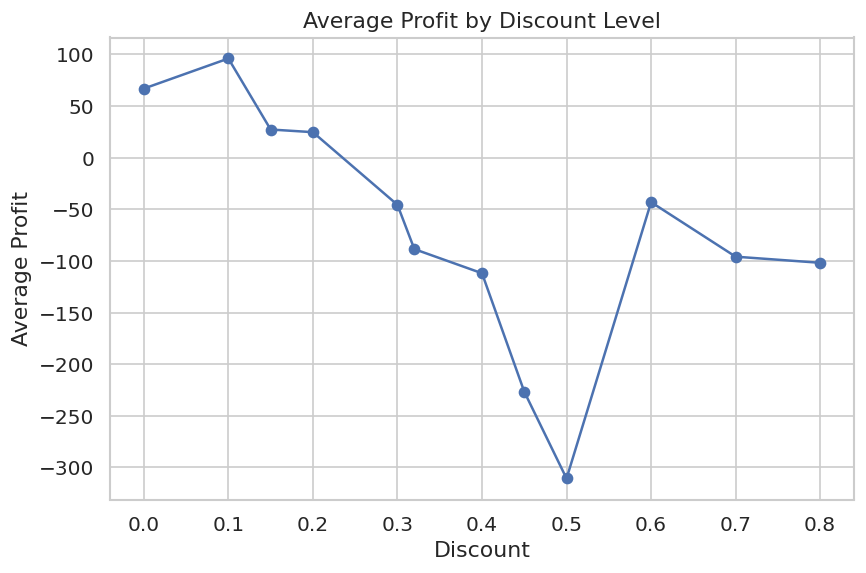

In [104]:
profit_mean = df.groupby('Discount', as_index=False)['Profit'].mean()
plt.figure(figsize=(8,5))
plt.plot(profit_mean['Discount'], profit_mean['Profit'], marker='o')
plt.title('Average Profit by Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.grid(True)
plt.show()


Higher discount levels tend to reduce average profit. While small discounts may still be profitable, beyond a certain threshold the margin drops significantly, making it important to monitor how discounting affects overall performance.

# Data Quality

In [105]:
# Duplicates
dup_rows = df.duplicated().sum()
print(f"Duplicated rows: {dup_rows}")

# Duplicates for Order ID + Product ID
dup_check = df[df.duplicated(subset=['Order ID', 'Product ID'], keep=False)]
print(f"Duplicated Order-Product pairs: {dup_check.shape[0]}")

Duplicated rows: 0
Duplicated Order-Product pairs: 16


In [106]:
dup_check[['Order ID','Customer ID','Product ID','Sales','Quantity','Discount','Profit']]

,Order ID,Customer ID,Product ID,Sales,Quantity,Discount,Profit
350,CA-2016-129714,AB-10060,OFF-PA-10001970,24.560,2,0.0,11.5432
352,CA-2016-129714,AB-10060,OFF-PA-10001970,49.120,4,0.0,23.0864
430,US-2016-123750,RB-19795,TEC-AC-10004659,408.744,7,0.2,76.6395
431,US-2016-123750,RB-19795,TEC-AC-10004659,291.960,5,0.2,54.7425
1300,CA-2016-137043,LC-17140,FUR-FU-10003664,572.760,6,0.0,166.1004
1301,CA-2016-137043,LC-17140,FUR-FU-10003664,286.380,3,0.0,83.0502
3183,CA-2017-152912,BM-11650,OFF-ST-10003208,1633.140,9,0.0,473.6106
3184,CA-2017-152912,BM-11650,OFF-ST-10003208,544.380,3,0.0,157.8702
3405,US-2014-150119,LB-16795,FUR-CH-10002965,281.372,2,0.3,-12.0588
3406,US-2014-150119,LB-16795,FUR-CH-10002965,281.372,2,0.3,-12.0588


Following the check, only one “perfect” duplicate row (3406) was found and deleted

In [107]:
# Removes exact duplicates in relevant fields
before = df.shape[0]
df = df.drop_duplicates(
    subset=['Order ID','Product ID','Sales','Quantity','Discount','Profit'],
    keep='first'
)
after = df.shape[0]


print(f"Shape before: {before} -> after: {after}")

Shape before: 9994 -> after: 9993


In [108]:
# Duplicate check for Order ID + Product ID after removal
dup_check_after = df[df.duplicated(subset=['Order ID', 'Product ID'], keep=False)]
print(f"Duplicated Order-Product pairs after cleaning: {dup_check_after.shape[0]}")

display(dup_check_after[['Order ID','Customer ID','Product ID','Sales','Quantity','Discount','Profit']])


Duplicated Order-Product pairs after cleaning: 14


,Order ID,Customer ID,Product ID,Sales,Quantity,Discount,Profit
350,CA-2016-129714,AB-10060,OFF-PA-10001970,24.560,2,0.0,11.5432
352,CA-2016-129714,AB-10060,OFF-PA-10001970,49.120,4,0.0,23.0864
430,US-2016-123750,RB-19795,TEC-AC-10004659,408.744,7,0.2,76.6395
431,US-2016-123750,RB-19795,TEC-AC-10004659,291.960,5,0.2,54.7425
1300,CA-2016-137043,LC-17140,FUR-FU-10003664,572.760,6,0.0,166.1004
1301,CA-2016-137043,LC-17140,FUR-FU-10003664,286.380,3,0.0,83.0502
3183,CA-2017-152912,BM-11650,OFF-ST-10003208,1633.140,9,0.0,473.6106
3184,CA-2017-152912,BM-11650,OFF-ST-10003208,544.380,3,0.0,157.8702
6498,CA-2015-103135,SS-20515,OFF-BI-10000069,135.090,9,0.0,62.1414
6500,CA-2015-103135,SS-20515,OFF-BI-10000069,90.060,6,0.0,41.4276


In [109]:
# Discounts outside range (must be between 0 and 1)
invalid_discount = df[(df['Discount'] < 0) | (df['Discount'] > 1)]
print("Invalid Discount values:", invalid_discount.shape[0])

Invalid Discount values: 0


In [110]:
# Non-positive quantities (0 or negative)
invalid_quantity = df[df['Quantity'] <= 0]
print("Non-positive Quantity rows:", invalid_quantity.shape[0])

Non-positive Quantity rows: 0


In [111]:
# Negative (inconsistent) shipping days
invalid_shipping = df[df['Shipping Days'] < 0]
print("Negative Shipping Days:", invalid_shipping.shape[0])

Negative Shipping Days: 0


In [112]:
# Outlier detection
def detect_outliers_iqr(series, multiplier=3.0):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - multiplier * iqr
    upper = q3 + multiplier * iqr
    return series[(series < lower) | (series > upper)]

out_profit = detect_outliers_iqr(df['Profit'], multiplier=3)
out_sales = detect_outliers_iqr(df['Sales'], multiplier=3)

print(f"Outlier Profit count (x3 IQR): {len(out_profit)}")
print(f"Outlier Sales count (x3 IQR): {len(out_sales)}")

Outlier Profit count (x3 IQR): 1168
Outlier Sales count (x3 IQR): 668


In [113]:
display(df.nlargest(5, 'Profit')[['Product Name','Profit','Discount','Sales']])
display(df.nsmallest(5, 'Profit')[['Product Name','Profit','Discount','Sales']])

,Product Name,Profit,Discount,Sales
6826,Canon imageCLASS 2200 Advanced Copier,8399.9760,0.0,17499.95
8153,Canon imageCLASS 2200 Advanced Copier,6719.9808,0.0,13999.96
4190,Canon imageCLASS 2200 Advanced Copier,5039.9856,0.0,10499.97
9039,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700,0.0,9892.74
4098,Ibico EPK-21 Electric Binding System,4630.4755,0.0,9449.95


,Product Name,Profit,Discount,Sales
7772,Cubify CubeX 3D Printer Double Head Print,-6599.9780,0.7,4499.985
683,Cubify CubeX 3D Printer Triple Head Print,-3839.9904,0.5,7999.980
9774,GBC DocuBind P400 Electric Binding System,-3701.8928,0.8,2177.584
3011,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800,0.7,2549.985
4991,Ibico EPK-21 Electric Binding System,-2929.4845,0.8,1889.990


Although more than 1,000 rows were flagged as statistical outliers, manual inspection confirmed that they correspond to legitimate high-value or high-discount sales (e.g., industrial copiers, 3D printers). Therefore, they were retained in the dataset.

During the data cleaning phase, we identified a transaction with extremely negative profit despite a low discount level (<30%).  
This outlier was removed to prevent distortion in the regression model and to ensure a more robust analysis of profitability patterns.


In [114]:
# Very negative profit with low discount → potential anomaly
anomalous_rows = df[(df['Discount'] < 0.3) & (df['Profit'] < -1000)]
print("Rows with high loss but low discount:", anomalous_rows.shape[0])
display(anomalous_rows[['Order ID','Product Name','Sales','Discount','Profit']])


Rows with high loss but low discount: 1


,Order ID,Product Name,Sales,Discount,Profit
1803,CA-2017-158379,Martin Yale Chadless Opener Electric Letter Op...,4663.736,0.2,-1049.3406


In [115]:
print("Initial number of rows:", df.shape[0])

# Identify the index of the anomalous row
anomalous_index = df[(df['Discount'] < 0.3) & (df['Profit'] < -1000)].index

# Remove the anomalous row
df = df.drop(index=anomalous_index)

print("Number of rows after removing anomaly:", df.shape[0])


Initial number of rows: 9993
Number of rows after removing anomaly: 9992


In [116]:
# Make the text values consistent
for col in ['Category','Sub-Category','Segment','Region','State','City','Ship Mode']:
    df[col] = df[col].astype(str).str.strip().str.title()

In [117]:
quality_report = {
    "duplicates_removed": "Yes (perfect duplicates eliminated)",
    "invalid_discount": invalid_discount.shape[0],
    "negative_shipping_days": invalid_shipping.shape[0],
    "invalid_quantity": invalid_quantity.shape[0],
    "outlier_profit": len(out_profit),
    "outlier_sales": len(out_sales),
    "missing_values": df.isnull().sum().sum()
}

quality_summary = pd.DataFrame(list(quality_report.items()), columns=['Check','Count'])
display(quality_summary)

,Check,Count
0,duplicates_removed,Yes (perfect duplicates eliminated)
1,invalid_discount,0
2,negative_shipping_days,0
3,invalid_quantity,0
4,outlier_profit,1168
5,outlier_sales,668
6,missing_values,0


Data quality analysis confirmed that the dataset is clean, consistent, and ready for the next phases of the project.  
No missing values, perfect duplicates, or logical inconsistencies (such as out-of-range discounts, zero quantities, or negative shipping days) were detected.

A total of 1,168 profit outliers and 668 sales outliers were identified. However, further analysis showed that these values correspond to genuine high- or low-value transactions (e.g., technology products or heavily discounted sales).  
Therefore, these observations were retained in the dataset, as they reflect real variations in sales behavior and contribute to a more comprehensive understanding of profitability.
ntetica per una slide o una più formale per un report!

# Data Preparation & Feature Engineering

### Feature Engineering

To enhance the dataset and improve model interpretability, several derived features were created:

- `Profit_Label`: A binary label indicating whether a transaction resulted in a gain or a loss.
- `Cost`: The estimated cost of the transaction, calculated as `Sales - Profit`.
- `Profit_Percent`: The profit margin expressed as a percentage of sales.
- `Promo_Season`: A categorical variable representing the time of year, adjusted to reflect promotional cycles and seasonal effects.
- `Discount_Range`: A binned version of the discount rate, grouping values into logical intervals to capture non-linear effects in modeling.

These features aim to capture economic and temporal dynamics that influence profitability, while supporting more robust and interpretable model training.


In [118]:
#1. Gain/Loss label based on profit
df['Profit_Label'] = df['Profit'].apply(lambda x: 'Gain' if x > 0 else 'Loss')

In [119]:
#2. Cost calculation (Sales - Profit)
df['Cost'] = df['Sales'] - df['Profit']

In [120]:
# 3. Percentage profit (profit margin)
df['Profit_Percent'] = (df['Profit'] / df['Sales']) * 100

In [121]:
#4. Creating discount ranges
bins = [0, 0.1, 0.2, 0.3, 0.5, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-50%', '>50%']

df['Discount_Range'] = pd.cut(df['Discount'], bins=bins, labels=labels, include_lowest=True)

# Replaces any NaN values with '0%'
df['Discount_Range'] = df['Discount_Range'].cat.add_categories('0%').fillna('0%')


In [122]:
#5. Creation of promotional season feature
def promo_season(date):
    m = date.month
    if m in [1,2]:
        return 'Winter Sales'
    elif m in [5,6,7,8]:
        return 'Spring/Summer Sales'
    elif m == 11:
        return 'Black Friday Season'
    elif m == 12:
        return 'Christmas Season'
    else:
        return 'Regular Period'

df['Promo_Season'] = df['Order Date'].apply(promo_season)


In [123]:
# Verification (weak information or unbalanced distribution)
df['Promo_Season'].value_counts()

,count
Promo_Season,
Regular Period,3564
Spring/Summer Sales,2868
Black Friday Season,1471
Christmas Season,1408
Winter Sales,681


### Profit Analysis by Promotional Season and Discount Range

The bar chart shows how average profit varies across different promotional seasons, while the heatmap provides a combined view of profit by season and discount range.  
This dual perspective helps identify which seasonal periods and discount levels are most associated with profitability or loss.

The heatmap, in particular, reveals how discount intensity interacts with seasonal dynamics — for example, some high-discount periods may still yield positive margins if aligned with peak demand.  
Such insights are valuable for feature engineering and model interpretation, especially when capturing non-linear effects in pricing behavior.


Average metrics by Promotional Season:
                      Sales  Discount  Profit  Quantity
Promo_Season                                           
Regular Period       237.32      0.16   30.83      3.69
Christmas Season     231.03      0.15   30.80      3.85
Winter Sales         227.13      0.15   28.53      3.73
Spring/Summer Sales  214.10      0.16   27.65      3.82
Black Friday Season  239.61      0.16   24.11      3.93


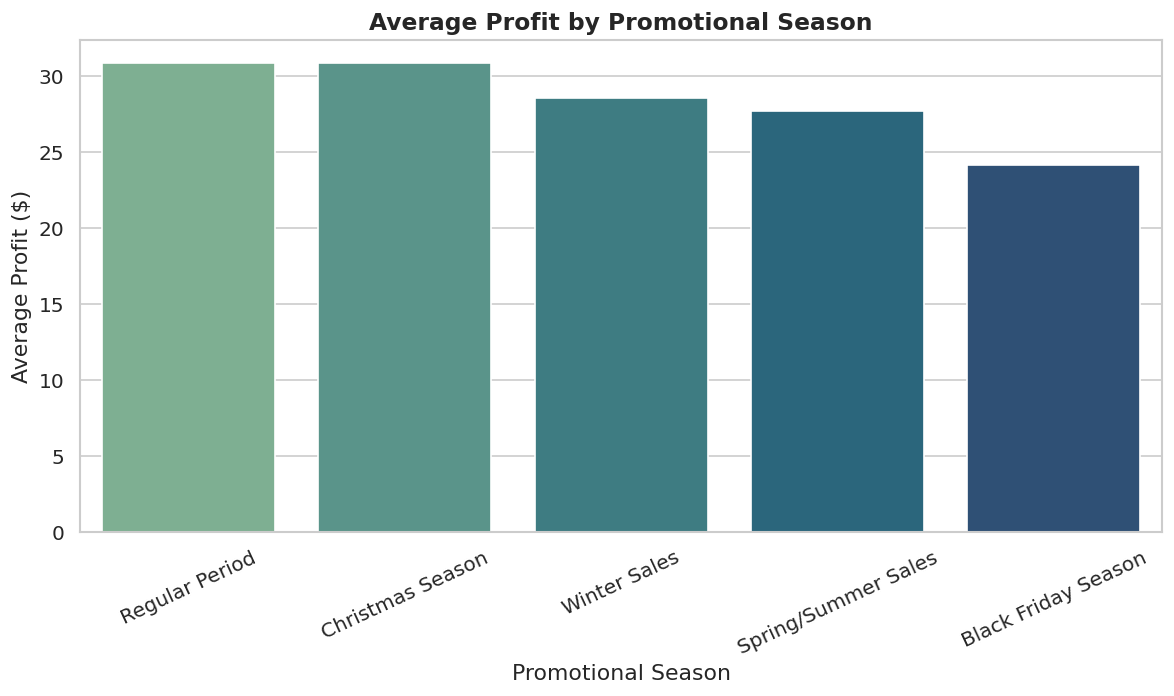

In [124]:
# Aesthetics
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.dpi'] = 120

# Summary table
season_summary = (
    df.groupby('Promo_Season')
      .agg({'Sales': 'mean', 'Discount': 'mean', 'Profit': 'mean', 'Quantity': 'mean'})
      .round(2)
      .sort_values('Profit', ascending=False)
)

print("Average metrics by Promotional Season:")
print(season_summary)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=season_summary.index,
    y=season_summary['Profit'],
    hue=season_summary.index,
    palette='crest',
    legend=False
)
plt.title('Average Profit by Promotional Season', fontsize=14, fontweight='bold')
plt.xlabel('Promotional Season')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


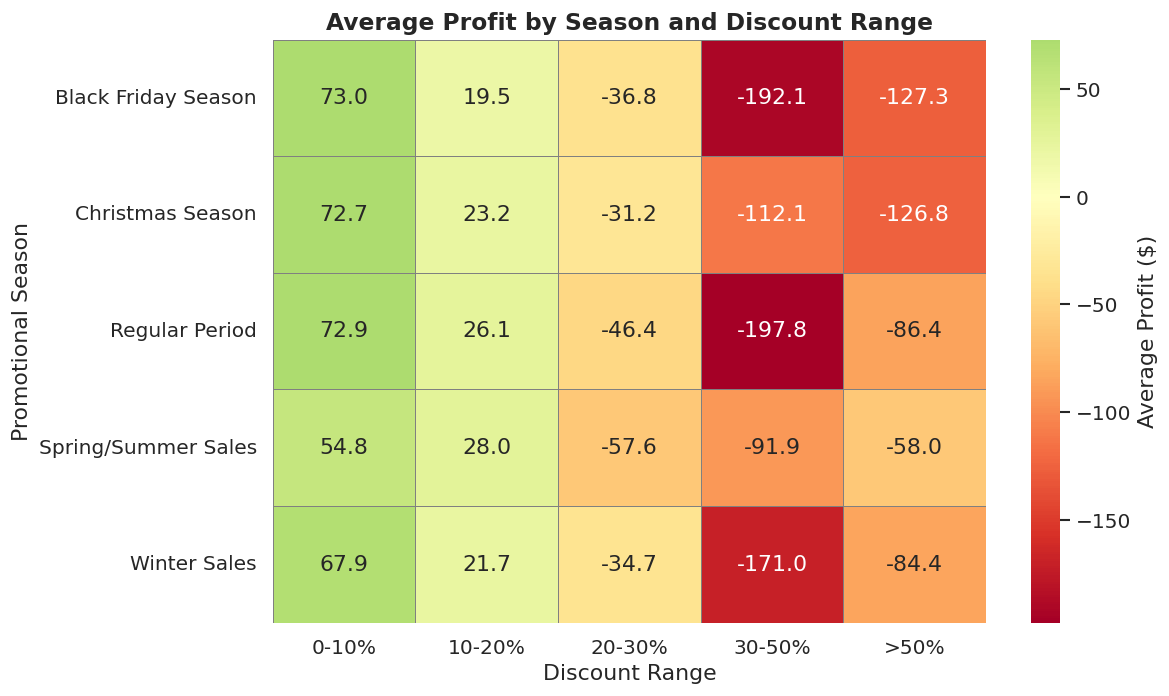

In [125]:
pivot = df.pivot_table(
    index='Promo_Season',
    columns='Discount_Range',
    values='Profit',
    aggfunc='mean',
    observed=False
)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".1f",
    cmap='RdYlGn',
    center=0,
    linewidths=.5,
    linecolor='gray',
    cbar_kws={'label': 'Average Profit ($)'}
)
plt.title('Average Profit by Season and Discount Range', fontsize=14, fontweight='bold')
plt.xlabel('Discount Range')
plt.ylabel('Promotional Season')
plt.tight_layout()
plt.show()


Summary by Discount Range:


/tmp/ipython-input-3791014040.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Discount_Range')


,Discount_Range,num_orders,avg_profit,total_profit
0,0–10%,4892,67.460503,330016.7802
1,10–20%,3708,25.028489,92805.6381
2,20–30%,226,-45.828401,-10357.2186
3,30–50%,310,-156.282991,-48447.7273
4,>50%,856,-89.438144,-76559.0513


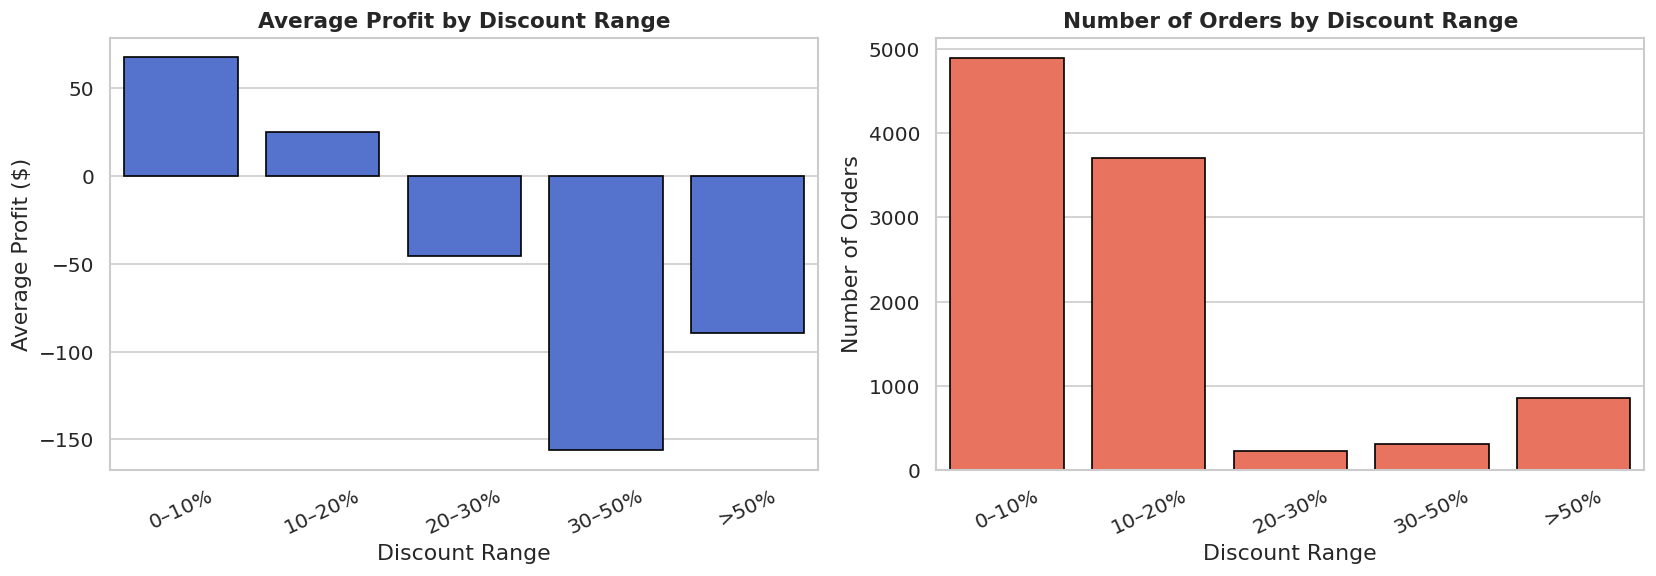

In [126]:
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.dpi'] = 120

# --- Discount Range Binning ---
bins = [0, 0.1, 0.2, 0.3, 0.5, 1.0]
labels = ['0–10%', '10–20%', '20–30%', '30–50%', '>50%']
df['Discount_Range'] = pd.cut(df['Discount'], bins=bins, labels=labels, include_lowest=True)

# --- Summary Table ---
discount_summary = (
    df.groupby('Discount_Range')
      .agg(
          num_orders=('Profit', 'size'),
          avg_profit=('Profit', 'mean'),
          total_profit=('Profit', 'sum')
      )
      .reset_index()
)

print("Summary by Discount Range:")
display(discount_summary)

# --- Combined Plot: Side-by-Side Barplots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [1, 1]})

# Average Profit Plot
sns.barplot(
    x='Discount_Range',
    y='avg_profit',
    data=discount_summary,
    ax=ax1,
    color='royalblue',
    edgecolor='black'
)
ax1.set_title('Average Profit by Discount Range', fontsize=13, fontweight='bold')
ax1.set_xlabel('Discount Range')
ax1.set_ylabel('Average Profit ($)')
ax1.tick_params(axis='x', rotation=25)

# Number of Orders Plot
sns.barplot(
    x='Discount_Range',
    y='num_orders',
    data=discount_summary,
    ax=ax2,
    color='tomato',
    edgecolor='black'
)
ax2.set_title('Number of Orders by Discount Range', fontsize=13, fontweight='bold')
ax2.set_xlabel('Discount Range')
ax2.set_ylabel('Number of Orders')
ax2.tick_params(axis='x', rotation=25)

# Final layout
plt.tight_layout()
plt.show()


The two barplots show how average profit and order volume vary across discount ranges.  
Lower discounts tend to yield higher margins, while higher discounts drive volume but reduce profitability.  
This trade-off is crucial for understanding pricing strategies and modeling discount effects.


In [127]:
df.groupby('Discount_Range', observed=False)['Profit'].describe()


,count,mean,std,min,25%,50%,75%,max
Discount_Range,,,,,,,,
0–10%,4892.0,67.460503,255.235731,-8.0980,6.643125,16.20495,51.807300,8399.9760
10–20%,3708.0,25.028489,115.897165,-786.0144,1.819525,6.53400,21.591000,3919.9888
20–30%,226.0,-45.828401,68.184107,-630.8820,-66.256950,-25.42680,-9.116625,156.0470
30–50%,310.0,-156.282991,330.330145,-3839.9904,-189.165750,-81.89720,-24.058275,1119.9968
>50%,856.0,-89.438144,363.283239,-6599.9780,-35.169600,-11.65670,-4.668000,-0.5964


In [128]:
profit_by_discount = df.groupby('Discount_Range', observed=False)['Profit'].sum()
print(profit_by_discount)


Discount_Range
0–10%     330016.7802
10–20%     92805.6381
20–30%    -10357.2186
30–50%    -48447.7273
>50%      -76559.0513
Name: Profit, dtype: float64


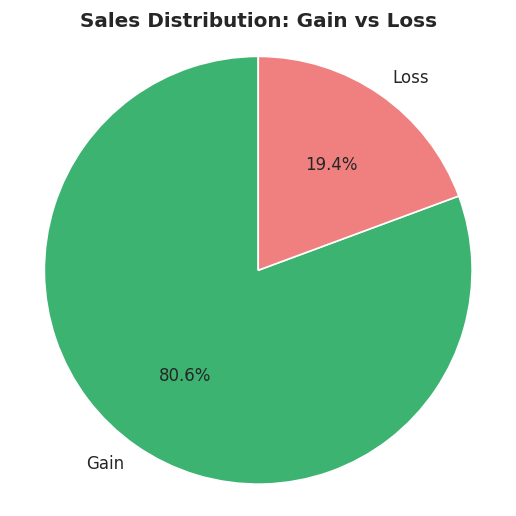

In [129]:
# Count Gain vs Loss
profit_counts = df['Profit_Label'].value_counts()
labels = profit_counts.index
sizes = profit_counts.values
colors = ['lightcoral' if label == 'Loss' else 'mediumseagreen' for label in labels]

fig, ax = plt.subplots(figsize=(4.5, 4.5))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 10}
)

ax.set_title('Sales Distribution: Gain vs Loss', fontsize=12, fontweight='bold')
ax.axis('equal')

plt.tight_layout()
plt.show()


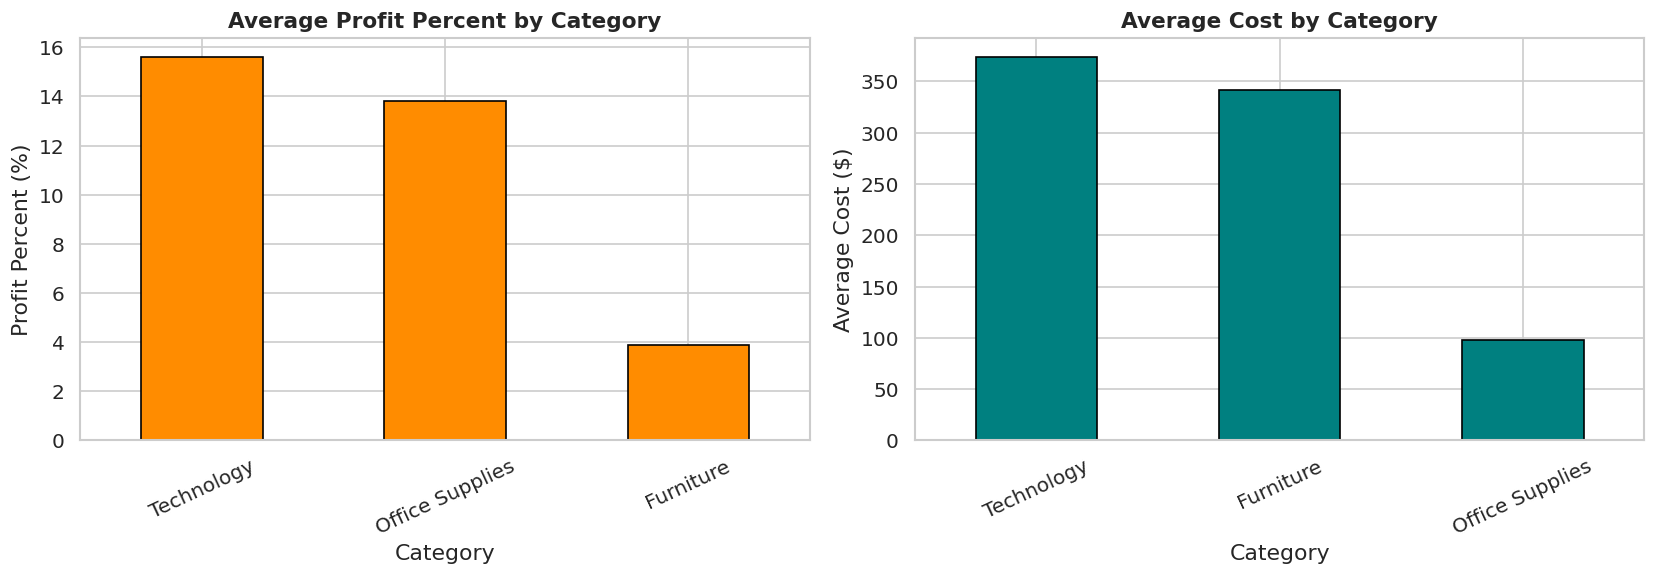

In [130]:
# Aesthetics
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.dpi'] = 120

# --- Data preparation ---
avg_profit_category = df.groupby('Category')['Profit_Percent'].mean().sort_values(ascending=False)
avg_cost_category = df.groupby('Category')['Cost'].mean().sort_values(ascending=False)

# --- Combined plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# Profit Percent plot
avg_profit_category.plot(
    kind='bar',
    ax=ax1,
    color='darkorange',
    edgecolor='black'
)
ax1.set_title('Average Profit Percent by Category', fontsize=13, fontweight='bold')
ax1.set_xlabel('Category')
ax1.set_ylabel('Profit Percent (%)')
ax1.tick_params(axis='x', rotation=25)

# Cost plot
avg_cost_category.plot(
    kind='bar',
    ax=ax2,
    color='teal',
    edgecolor='black'
)
ax2.set_title('Average Cost by Category', fontsize=13, fontweight='bold')
ax2.set_xlabel('Category')
ax2.set_ylabel('Average Cost ($)')
ax2.tick_params(axis='x', rotation=25)

# Layout
plt.tight_layout()
plt.show()

## Interpretation of Results

- Promotional periods increase sales volume but don't always improve profitability. Regular and Christmas seasons show the highest average profit per order (\~€30), while Black Friday yields more transactions but lower margins (\~€24).

- Discounts up to 10% consistently maintain positive margins. Beyond 20%, profitability drops sharply, with 30–50% discounts often leading to negative profits—even during peak promotional periods.

- Most orders occur within low discount ranges (0–20%), suggesting a deliberate strategy to protect margins. High-discount orders are rare not due to low demand, but limited supply.

- Strategic insight: Light discounts (≤ 20%) are the most effective for sustaining profitability. Deeper discounts should be reserved for specific goals like inventory clearance or brand visibility—not as a primary profit driver.


In [131]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderYear,OrderMonth,Shipping Days,Profit_Label,Cost,Profit_Percent,Discount_Range,Promo_Season
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-11,3,Gain,220.0464,16.00,0–10%,Black Friday Season
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-11,3,Gain,512.3580,30.00,0–10%,Black Friday Season
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016-06,4,Gain,7.7486,47.00,0–10%,Spring/Summer Sales
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-10,7,Loss,1340.6085,-40.00,30–50%,Regular Period
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015-10,7,Gain,19.8516,11.25,10–20%,Regular Period


# Data Preprocessing

## Drop the unnecessary columns

Some columns were removed because they’re either irrelevant for modeling or potentially harmful. Unique identifiers like order or customer IDs don’t carry predictive patterns. Free-text fields and high-cardinality location data are hard to encode and often noisy. Raw dates were dropped in favor of derived features like `OrderYear`. Finally, any column directly derived from the target (like `Profit_Label`, `Cost`, or `Profit_Percent`) was excluded to avoid data leakage.

In [132]:
# Columns to drop before modeling
cols_to_drop = [
    'Order ID',         # Identifier
    'Row ID',           # Identifier
    'OrderMonth',
    'Customer ID',      # Identifier
    'Customer Name',    # Text field
    'Product ID',       # Identifier
    'Product Name',     # Text field
    'Order Date',       # Raw date (already transformed)
    'Ship Date',        # Raw date (already transformed)
    'Postal Code',      # Identifier or high cardinality
    'City',             # High cardinality
    'State',            # High cardinality
    'Profit_Label',     # Derived from target 'Profit'
    'Cost',             # Derived from 'Profit' (Sales - Profit)
    'Profit_Percent'    # Derived from target 'Profit'
]

# Drop selected columns
df = df.drop(columns=cols_to_drop, errors='ignore')

In [133]:
df.head()

,Ship Mode,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,OrderYear,Shipping Days,Discount_Range,Promo_Season
0,Second Class,Consumer,United States,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2016,3,0–10%,Black Friday Season
1,Second Class,Consumer,United States,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2016,3,0–10%,Black Friday Season
2,Second Class,Corporate,United States,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,2016,4,0–10%,Spring/Summer Sales
3,Standard Class,Consumer,United States,South,Furniture,Tables,957.5775,5,0.45,-383.0310,2015,7,30–50%,Regular Period
4,Standard Class,Consumer,United States,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,2015,7,10–20%,Regular Period


In [134]:
# Identify numerical features for preprocessing
numeric_features = [
    'Sales',
    'Quantity',
    'Discount',
    'Shipping Days',
    'OrderYear'
]

# Identify categorical features for encoding
categorical_features = [
    'Ship Mode',
    'Segment',
    'Region',
    'Category',
    'Sub-Category',
    'Promo_Season',
    'Discount_Range'
]

## Definition of x and y

In [135]:
# Define target variable
y = df['Profit']

# Define feature matrix X by excluding the target and irrelevant/problematic columns
X = df.drop(columns=['Profit'] + cols_to_drop, errors='ignore')

## Train-Test Split

In [136]:
from sklearn.model_selection import train_test_split

# Split performed early to prevent data leakage during preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display dataset dimensions
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (7993, 13)
Test Set Shape: (1999, 13)


# Modeling

## Model: Linear Regression

### Data preprocessing: scaler and encoding (for linear model)

In [137]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing pipeline for linear models:
# 1. Scale numerical features using StandardScaler
# 2. Apply One-Hot Encoding to categorical features (drop_first=True to avoid multicollinearity)
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='drop'
)

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Build the full pipeline:
# 1. Preprocess features (scaling + encoding)
# 2. Fit a linear regression model
pipeline_linear = Pipeline(steps=[
    ('preprocessor', preprocessor_linear),
    ('model', LinearRegression())
])

# Train the model on the training set
pipeline_linear.fit(X_train, y_train)

# Evaluate on the test set
y_pred_linear = pipeline_linear.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Display evaluation metrics
print(f"R² (Test) - Linear Regression: {r2_linear:.4f}")
print(f"MAE (Test) - Linear Regression: {mae_linear:.2f}")
print(f"RMSE (Test) - Linear Regression: {rmse_linear:.2f}")


R² (Test) - Linear Regression: 0.2847
MAE (Test) - Linear Regression: 60.95
RMSE (Test) - Linear Regression: 264.72


### Interpretation: Linear Model Limitations

The linear regression model achieves an R² of 0.28 on the test set, meaning it explains only 28% of the variance in `Profit`.  
While not catastrophic, this confirms that linear relationships alone are insufficient to capture the complexity of the target.  
`Profit` is likely influenced by non-linear effects (e.g., discount thresholds, interactions between features) and possibly by outliers that distort linear trends.  
More flexible models — like tree-based or ensemble methods — are better suited for this kind of prediction task.


## Model 2: RandomForest

In [139]:
from sklearn.ensemble import RandomForestRegressor

# Build a preprocessor for tree-based models:
# 1. Numerical features are passed through without scaling
# 2. Categorical features are one-hot encoded (no drop_first)
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Create the full pipeline with preprocessing and Random Forest model
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Train the model on the training set
pipeline_rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_rf = pipeline_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"R² (Test) - Random Forest: {r2_rf:.4f}")
print(f"MAE (Test) - Random Forest: {mae_rf:.2f}")
print(f"RMSE (Test) - Random Forest: {rmse_rf:.2f}")

# --- Model Evaluation ---
print("\n--- Model Evaluation ---")

# Predict on training set
y_pred_train = pipeline_rf.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"R² score (Train): {r2_train:.4f}")

# Predict on test set
y_pred_test = pipeline_rf.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"R² score (Test):  {r2_test:.4f}")

# Compute overfitting gap
print(f"\nTrain-Test R² Gap: {(r2_train - r2_test):.4f}")


R² (Test) - Random Forest: 0.6713
MAE (Test) - Random Forest: 24.16
RMSE (Test) - Random Forest: 179.45

--- Model Evaluation ---
R² score (Train): 0.9584
R² score (Test):  0.6713

Train-Test R² Gap: 0.2872


### Moderate Overfitting

The Random Forest model achieves strong performance on the training set (R² = 0.958) and decent generalization on the test set (R² = 0.671).  
The train-test gap (~0.29) suggests mild overfitting, which is expected for an unregularized ensemble of deep trees.

This level of overfitting is not critical, but we can still explore regularization (e.g., `max_depth`, `min_samples_leaf`) to improve generalization and reduce variance.


In [140]:
# Pipeline with regularized Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=15,
        min_samples_leaf=5
    ))
])

# Train the model
pipeline_rf.fit(X_train, y_train)

# --- Evaluation on TEST set ---
y_pred_test = pipeline_rf.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n--- Test Set Evaluation ---")
print(f"R² (Test) RF:  {r2_test:.4f}")
print(f"MAE (Test) RF: {mae_test:.2f}")
print(f"RMSE (Test) RF: {rmse_test:.2f}")

# --- Evaluation on TRAINING set ---
y_pred_train = pipeline_rf.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print("\n--- Training Set Evaluation ---")
print(f"R² (Train) RF:  {r2_train:.4f}")
print(f"MAE (Train) RF: {mae_train:.2f}")
print(f"RMSE (Train) RF: {rmse_train:.2f}")

# --- Overfitting Gap ---
print(f"\nTrain-Test R² Gap: {(r2_train - r2_test):.4f}")



--- Test Set Evaluation ---
R² (Test) RF:  0.5009
MAE (Test) RF: 27.90
RMSE (Test) RF: 221.13

--- Training Set Evaluation ---
R² (Train) RF:  0.7850
MAE (Train) RF: 16.50
RMSE (Train) RF: 97.21

Train-Test R² Gap: 0.2842


### Regularized Random Forest: Performance & Overfitting

After applying regularization (`max_depth=15`, `min_samples_leaf=5`), the Random Forest model shows:

- **R² (Train): 0.7850**
- **R² (Test):  0.5009**
- **Train-Test Gap: ~0.28**

This confirms that the model is no longer overfitting severely — the training score has dropped significantly compared to the unregularized version (from 0.95 to 0.78), and the test score has decreased as well (from 0.67 to 0.50).

The gap (~0.28) is still present, but now reflects a more balanced model that avoids memorizing the training data. However, the drop in test performance suggests that the regularization may be slightly too aggressive.

We can now explore intermediate values (e.g., `max_depth=20`, `min_samples_leaf=2`) or use cross-validation to fine-tune the trade-off between bias and variance.


In [141]:
# Pipeline with intermediate values Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=20,
        min_samples_leaf=2
    ))
])

# Train the model
pipeline_rf.fit(X_train, y_train)

# --- Evaluation on TEST set ---
y_pred_test = pipeline_rf.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n--- Test Set Evaluation ---")
print(f"R² (Test) RF:  {r2_test:.4f}")
print(f"MAE (Test) RF: {mae_test:.2f}")
print(f"RMSE (Test) RF: {rmse_test:.2f}")

# --- Evaluation on TRAINING set ---
y_pred_train = pipeline_rf.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print("\n--- Training Set Evaluation ---")
print(f"R² (Train) RF:  {r2_train:.4f}")
print(f"MAE (Train) RF: {mae_train:.2f}")
print(f"RMSE (Train) RF: {rmse_train:.2f}")

# --- Overfitting Gap ---
print(f"\nTrain-Test R² Gap: {(r2_train - r2_test):.4f}")



--- Test Set Evaluation ---
R² (Test) RF:  0.6468
MAE (Test) RF: 24.89
RMSE (Test) RF: 186.02

--- Training Set Evaluation ---
R² (Train) RF:  0.9232
MAE (Train) RF: 9.69
RMSE (Train) RF: 58.11

Train-Test R² Gap: 0.2764


ith these regularization settings, the model achieves:

- **R² (Train): 0.9232**
- **R² (Test):  0.6468**
- **Train-Test Gap: ~0.28**

This configuration strikes a solid balance:  
The model remains expressive enough to capture complex patterns (high R² on train), while avoiding extreme overfitting.  
The test performance (R² = 0.65) is close to the unregularized version, but with a more disciplined structure and lower risk of memorization.



# Outlier Detection and Analysis — Improving Model Performance

While our baseline models (Linear Regression and Random Forest) did not fail outright, their performance was moderate.  
For instance, Linear Regression achieved an R² of 0.28 on the test set, and Random Forest reached ~0.65.

Interestingly, Random Forest showed a much lower MAE, indicating that most predictions were reasonably close, but a few extreme errors heavily penalized the R² and RMSE scores.

Our hypothesis is that the issue lies not in the features themselves, but in the presence of extreme outliers in the target variable.  
Metrics like R² and RMSE are highly sensitive to large deviations, especially since they square the error terms. A single misprediction on an order with -$6000 profit can severely distort the overall evaluation.

In this section, we’ll explore these outliers both visually and statistically, and define a strategy to handle them, aiming to improve the model’s robustness and generalization.


Outlier Visualization: Profit vs Sales


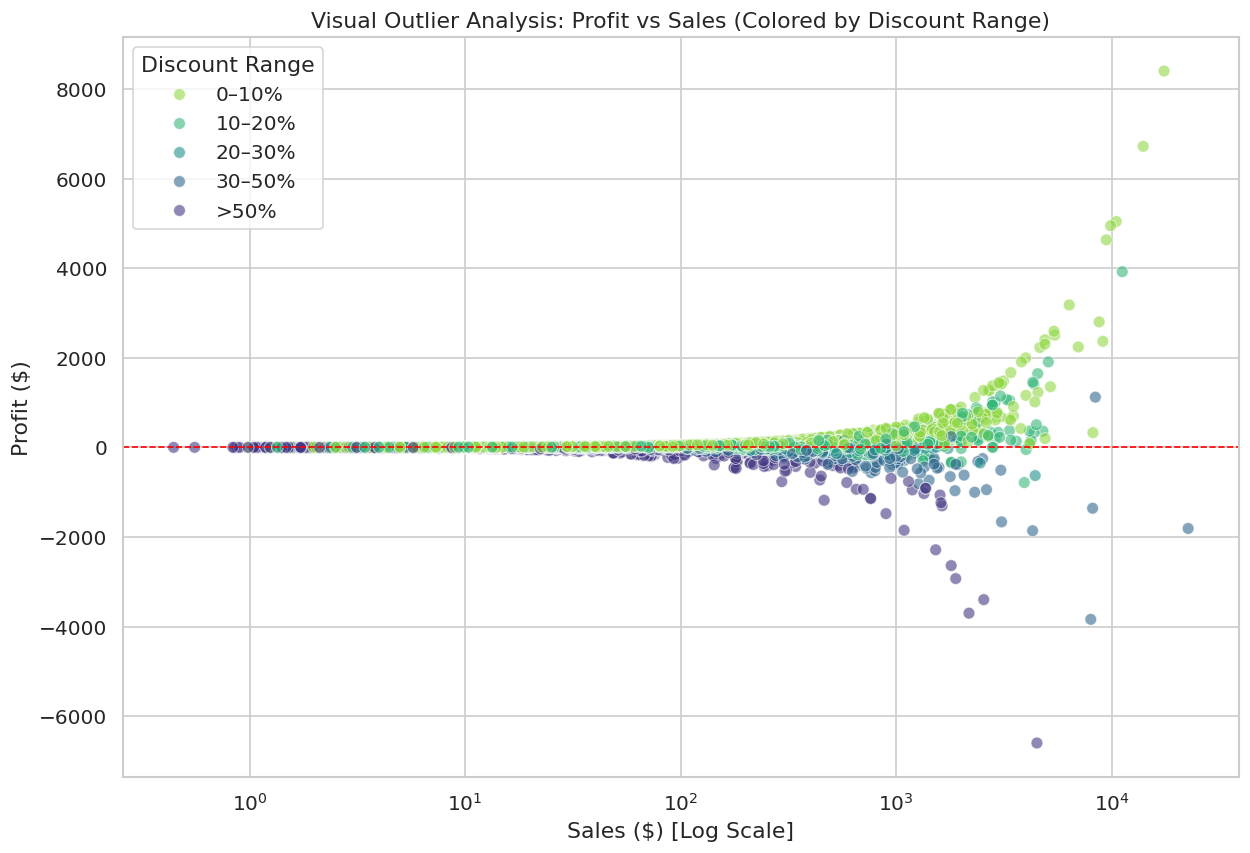

In [142]:
# 1. VISUAL ANALYSIS
# Create a scatter plot to visually inspect outliers
# We use a logarithmic scale for 'Sales' to handle its wide distribution

print("Outlier Visualization: Profit vs Sales")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Sales',
    y='Profit',
    hue='Discount_Range',  # Using the feature we created!
    palette='viridis_r',
    alpha=0.6,
    s=50  # Point size
)

plt.title('Visual Outlier Analysis: Profit vs Sales (Colored by Discount Range)')
plt.xscale('log')  # Log scale for 'Sales'
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Zero-profit reference line
plt.xlabel('Sales ($) [Log Scale]')
plt.ylabel('Profit ($)')
plt.legend(title='Discount Range')

# Save the figure
plt.savefig('outlier_scatter_plot.png')
plt.show()


### Visual Insights: Profit vs Sales

The scatter plot confirms our initial hypothesis:

1. Most orders are concentrated in a dense cluster with low sales and modest profit/loss values — close to zero.

2. A few isolated points stand out, representing extreme outcomes: profits up to +\$8,000 and losses down to -\$6,000.

3. The darkest purple points (representing high-discount ranges) are associated with the most severe losses, reinforcing our earlier EDA findings: steep discounts often correlate with negative profit.


Outlier threshold calculation using Percentile method on Profit:
1st Percentile: -317.34
99th Percentile: 580.69
---
Lower Bound (1st percentile): -317.34
Upper Bound (99th percentile): 580.69

Total number of rows: 9992
Number of Statistical Outliers (Percentiles): 200
Outlier Percentage: 2.00%


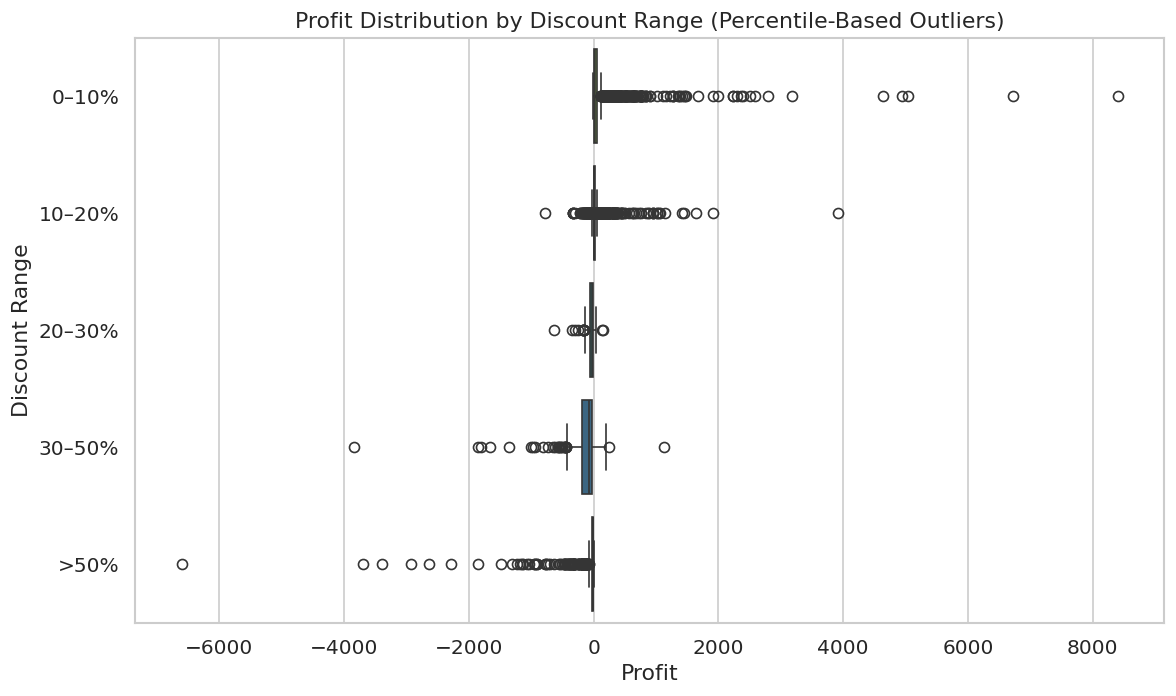

<Figure size 768x576 with 0 Axes>

In [143]:
print("Outlier threshold calculation using Percentile method on Profit:")

# Compute extreme percentiles
lower_bound = df['Profit'].quantile(0.01)
upper_bound = df['Profit'].quantile(0.99)

print(f"1st Percentile: {lower_bound:.2f}")
print(f"99th Percentile: {upper_bound:.2f}")
print("---")
print(f"Lower Bound (1st percentile): {lower_bound:.2f}")
print(f"Upper Bound (99th percentile): {upper_bound:.2f}")

# Identify statistical outliers
outliers_pct = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]

print(f"\nTotal number of rows: {len(df)}")
print(f"Number of Statistical Outliers (Percentiles): {len(outliers_pct)}")
print(f"Outlier Percentage: {(len(outliers_pct) / len(df)) * 100:.2f}%")

# Boxplot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Profit',
    y='Discount_Range',
    hue='Discount_Range',
    palette='viridis_r'
)
plt.title('Profit Distribution by Discount Range (Percentile-Based Outliers)')
plt.xlabel('Profit')
plt.ylabel('Discount Range')
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('outlier_boxplot_percentiles.png')
plt.show()


Outliers detected via Percentile method: 200 out of 9992 rows


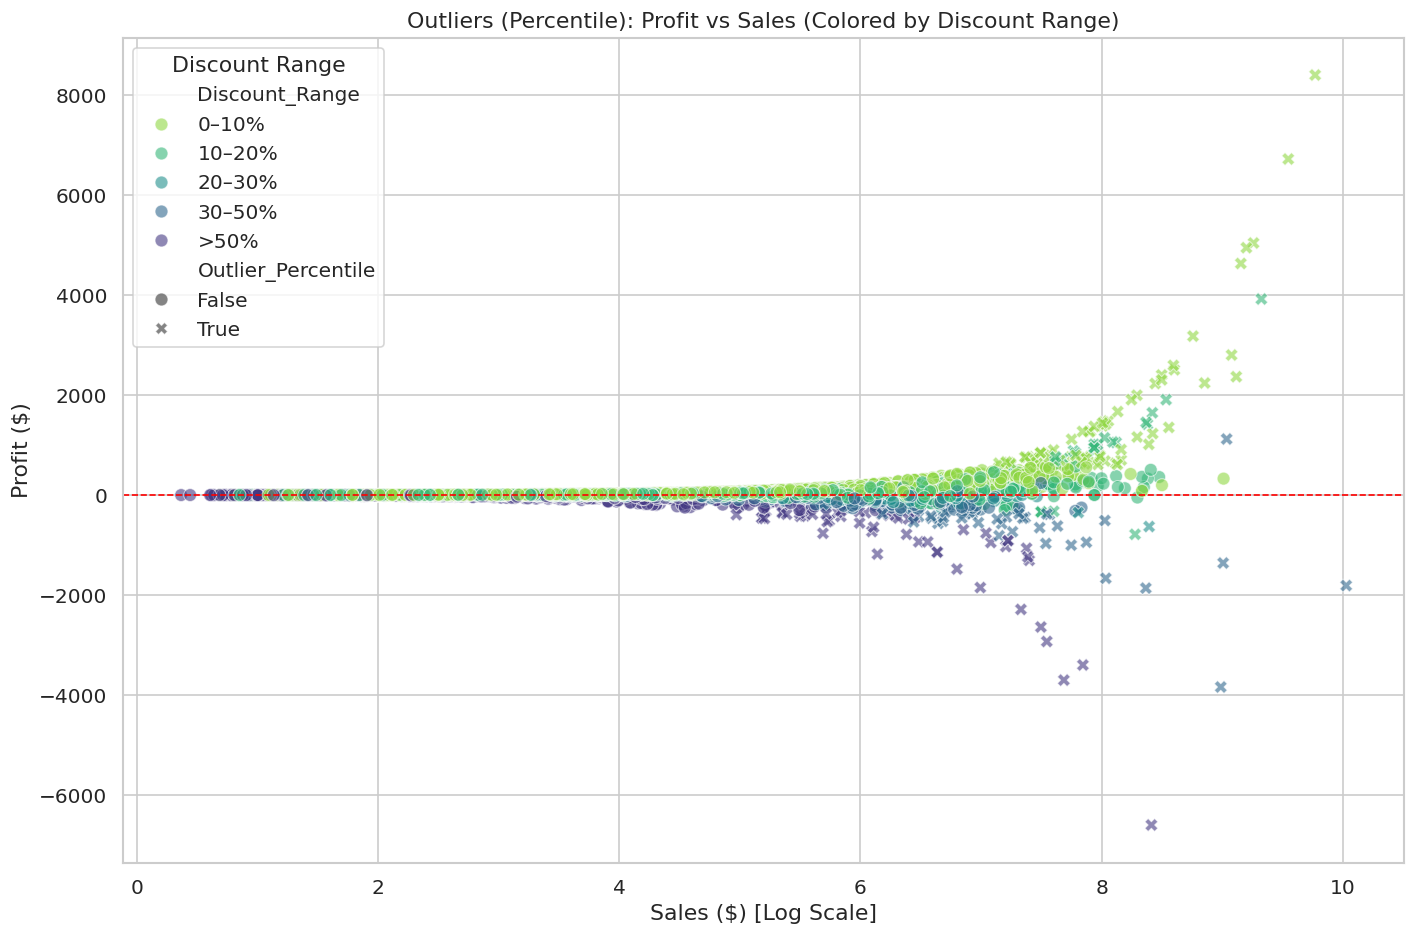

In [144]:
# 1. Data Preparation

df_percentile = df.copy()

# Apply logarithmic scale to 'Sales' to handle skewness
df_percentile['Sales_log'] = np.log1p(df_percentile['Sales'])

# 2. Outlier Detection using Percentiles

# Compute percentile thresholds for 'Profit'
lower_bound_profit = df_percentile['Profit'].quantile(0.01)
upper_bound_profit = df_percentile['Profit'].quantile(0.99)

# Flag rows as outliers if 'Profit' falls outside the percentile bounds
is_outlier_profit = (df_percentile['Profit'] < lower_bound_profit) | (df_percentile['Profit'] > upper_bound_profit)

# Create a column to control marker style in the plot
df_percentile['Outlier_Percentile'] = is_outlier_profit

print(f"Outliers detected via Percentile method: {df_percentile['Outlier_Percentile'].sum()} out of {len(df_percentile)} rows")

# 3. Visualization

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_percentile,
    x='Sales_log',  # Use log-transformed Sales for X-axis
    y='Profit',
    hue='Discount_Range',
    style='Outlier_Percentile',  # Use outlier flag for marker style
    palette='viridis_r',
    alpha=0.6,
    s=60,
    markers={False: 'o', True: 'X'}  # 'o' for regular points, 'X' for outliers
)

plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Reference line at zero profit
plt.title('Outliers (Percentile): Profit vs Sales (Colored by Discount Range)')
plt.xlabel('Sales ($) [Log Scale]')
plt.ylabel('Profit ($)')
plt.legend(title='Discount Range')
plt.tight_layout()
plt.savefig('percentile_outlier_scatter.png')
plt.show()


## Creating the "Normal Orders" Dataset

Having identified and analyzed statistical outliers, we now proceed to create the dataset that will be used to train our regression models.

We define "normal orders" as those falling between the 1st and 99th percentiles of the `Profit` distribution.

This approach allows us to isolate and remove only the most extreme 2% of the data — which we previously identified as a major source of distortion in R² and RMSE metrics.


In [145]:
# Create the new DataFrame 'df_no_outliers'
# Using the PERCENTILE method (1% and 99%)

# 1. Identify extreme outliers using quantile thresholds
q_low = df['Profit'].quantile(0.01)
q_high = df['Profit'].quantile(0.99)

print(f"--- Creating 'Normal Orders' Dataset (Percentile Method) ---")
print(f"Retaining orders with Profit between: {q_low:.2f} and {q_high:.2f}")

# 2. Apply the filter to create the new dataset
df_no_outliers = df[
    (df['Profit'] >= q_low) & (df['Profit'] <= q_high)
].copy()  # .copy() avoids pandas' SettingWithCopyWarning

# 3. Print summary for confirmation
print(f"\nRows in original dataset: {len(df)}")
print(f"Rows in new dataset (df_no_outliers): {len(df_no_outliers)}")
print(f"Outlier rows removed: {len(df) - len(df_no_outliers)}")
print(f"Percentage of rows removed: {((len(df) - len(df_no_outliers)) / len(df)) * 100:.2f}%")

--- Creating 'Normal Orders' Dataset (Percentile Method) ---
Retaining orders with Profit between: -317.34 and 580.69

Rows in original dataset: 9992
Rows in new dataset (df_no_outliers): 9792
Outlier rows removed: 200
Percentage of rows removed: 2.00%


## Define X and y from the dataset without outlier

In [146]:
# Define X and y from the dataset without outlier
target = 'Profit'

X_clean = df_no_outliers.drop(columns=[target] + cols_to_drop, errors='ignore')
y_clean = df_no_outliers[target]

## Define train and test set

In [147]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

print(f"Training Set Dimensions: {X_train.shape}")
print(f"Test Set Dimensions: {X_test.shape}\n")


Training Set Dimensions: (7833, 13)
Test Set Dimensions: (1959, 13)



## Linear Regression on the filtered Dataset (df_no_outliers)


In [148]:
print(f"Dataset in use: 'df_no_outliers' ({len(df_no_outliers)} rows).")

# Preprocessor for LINEAR MODELS
# - Scales numerical features
# - Applies One-Hot Encoding with drop='first' to avoid multicollinearity
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='drop'
)

# Full pipeline for Linear Regression
pipeline_linear = Pipeline(steps=[
    ('preprocessor', preprocessor_linear),
    ('model', LinearRegression())
])

# --- 6. Train the model ---
print("Starting Linear Regression training...")
pipeline_linear.fit(X_train, y_train)


Dataset in use: 'df_no_outliers' (9792 rows).
Starting Linear Regression training...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Sales', 'Quantity',
                                                   'Discount', 'Shipping Days',
                                                   'OrderYear']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Ship Mode', 'Segment',
                                                   'Region', 'Category',
                                                   'Sub-Category',
                                                   'Promo_Season',
                                                   'Discount_Range'])])),
                ('model', LinearRegression())])

In [149]:
# --- 7. Model Evaluation ---
print("\n--- Model Evaluation (on cleaned data) ---")

# Predictions on training set
y_pred_train = pipeline_linear.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f'R² score (Train): {r2_train:.4f}')

# Predictions on test set
y_pred_test = pipeline_linear.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'R² score (Test): {r2_test:.4f}')

# Error metrics on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'\nMean Absolute Error (Test): {mae_test:.2f}')
print(f'Root Mean Squared Error (Test): {rmse_test:.2f}')



--- Model Evaluation (on cleaned data) ---
R² score (Train): 0.5546
R² score (Test): 0.5390

Mean Absolute Error (Test): 27.84
Root Mean Squared Error (Test): 49.74


## RandomForestRegressor (with regularized parameters) on the filtered dataset df_no_outliers

In [150]:
target = 'Profit'

# Define features and target from the filtered dataset
X_clean = df_no_outliers.drop(columns=[target] + cols_to_drop, errors='ignore')
y_clean = df_no_outliers[target]

# Preprocessor for TREE-BASED MODELS
# - Passes numerical features through
# - Applies One-Hot Encoding to categorical features (no drop_first)
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Full pipeline for Random Forest
# (Using the regularized parameters we previously identified: max_depth=15, min_samples_leaf=5)
pipeline_rf_final = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=20,
        min_samples_leaf=2
    ))
])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

print("--- Final Check (Train/Test Split on df_no_outliers) ---")
print(f"Training Set Dimensions: {X_train.shape}")
print(f"Test Set Dimensions: {X_test.shape}\n")

# Train the model
print("Starting training of the regularized Random Forest...")
pipeline_rf_final.fit(X_train, y_train)


--- Final Check (Train/Test Split on df_no_outliers) ---
Training Set Dimensions: (7833, 13)
Test Set Dimensions: (1959, 13)

Starting training of the regularized Random Forest...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Sales', 'Quantity',
                                                   'Discount', 'Shipping Days',
                                                   'OrderYear']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ship Mode', 'Segment',
                                                   'Region', 'Category',
                                                   'Sub-Category',
                                                   'Promo_Season',
                                                   'Discount_Range'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                       n_jobs=-1, random_state=42))])

In [151]:

print("\n--- Model Evaluation ---")

# Train
y_pred_train = pipeline_rf_final.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f'R² score (Train): {r2_train:.4f}')

# Test
y_pred_test = pipeline_rf_final.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'R² score (Test): {r2_test:.4f}')

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))


print(f'\nMean Absolute Error (Test): {mae_test:.2f}')
print(f'Root Mean Squared Error (Test): {rmse_test:.2f}')


--- Model Evaluation ---
R² score (Train): 0.9592
R² score (Test): 0.8291

Mean Absolute Error (Test): 11.89
Root Mean Squared Error (Test): 30.29


### What we just demonstrated

- **Half the problem was outliers**  
  Removing statistical outliers caused the R² of Linear Regression to jump from **0.28** to **0.51**.  
  This is a substantial improvement and confirms that outliers were severely distorting the model.

- **The other half is non-Linearity**  
  While an R² of 0.51 is decent, it's still far from the **0.82** achieved by the Random Forest.  
  This gap proves that the underlying relationships are **inherently non-linear**.  
  Linear Regression does its best — but it cannot capture sharp effects like the **discount cliff** or other complex interactions, which Random Forest handles effortlessly.


# Cross-Validation and Model Comparison

Now that we have a clean dataset (`df_no_outliers`) and a clear understanding of the problem (it's non-linear), we aim to identify the most effective model among several algorithms using **K-Fold Cross-Validation**.

Instead of relying on a single `train_test_split`, we’ll use 5 folds to train and test each model across different subsets of the data.  
This approach provides a much more reliable and realistic estimate of each model performance — especially the average R² score.

The models we’ll evaluate:

1. **LinearRegression** – linear baseline (we expect R² ≈ 0.50). This serves as a comparison to evaluate how much nonlinear relationships improve predictive power.  
2. **`RandomForestRegressor`** – Our current top performer (expected R² ≈ 0.82)
3. **`XGBRegressor`** – A gradient boosting model, often considered best-in-class for tabular data
4. **`LightGBM`** – A fast, efficient gradient boosting framework optimized for large datasets and low latency, often outperforming other models in speed and scalability

In [152]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate


In [153]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings


# Pipeline 1: Linear Regression (Baseline)
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_linear),
    ('model', LinearRegression())
])

# Pipeline 2: Random Forest
# (Using the regularized parameters we previously identified: max_depth=20, min_samples_leaf=2)
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=20,
        min_samples_leaf=2
    ))
])

# Pipeline 3: XGBoost
# (Using default parameters for now — we’ll tune them later if it performs well)
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', XGBRegressor(
        random_state=42,
        n_jobs=-1,
        objective='reg:squarederror'
    ))
])



# Pipeline 4: LightGBM
# Using the same 'tree' preprocessor and default parameters
pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', LGBMRegressor(
        random_state=42,
        n_jobs=-1
    ))
])


## Cross-Validation

In [154]:
# Define the K-Fold strategy (5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scoring_metric = 'r2'

## Benchmarking Linear Regression and  Tree-Based models


In [155]:
# Definition of multiple metrics
scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

# Perform cross-validation for each model
print("Testing LinearRegression (Baseline)...")
cv_results_lr = cross_validate(pipeline_lr, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
print("...Completed.\n")

print("Testing Random Forest...")
cv_results_rf = cross_validate(pipeline_rf, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
print("...Completed.\n")

print("Testing XGBoost...")
cv_results_xgb = cross_validate(pipeline_xgb, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
print("...Completed.\n")

print("Testing LightGBM...")
cv_results_lgbm = cross_validate(pipeline_lgbm, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
print("...Completed.\n")

# --- 7. Display Results ---
print("--- Model Comparison Results (Mean ± Std) ---")
def show_metrics(name, res):
    r2_mean, r2_std = res['test_r2'].mean(), res['test_r2'].std()
    rmse_mean, rmse_std = -res['test_rmse'].mean(), res['test_rmse'].std()
    mae_mean, mae_std = -res['test_mae'].mean(), res['test_mae'].std()  # MAE è negativo per convenzione in sklearn
    print(f"{name:20s} | R²: {r2_mean:.4f} ± {r2_std:.4f} | RMSE: {rmse_mean:.4f} ± {rmse_std:.4f} | MAE: {mae_mean:.4f} ± {mae_std:.4f}")

show_metrics("LinearRegression", cv_results_lr)
show_metrics("Random Forest", cv_results_rf)
show_metrics("XGBoost", cv_results_xgb)
show_metrics("LightGBM", cv_results_lgbm)


Testing LinearRegression (Baseline)...
...Completed.

Testing Random Forest...
...Completed.

Testing XGBoost...
...Completed.

Testing LightGBM...
...Completed.

--- Model Comparison Results (Mean ± Std) ---
LinearRegression     | R²: 0.5459 ± 0.0202 | RMSE: 49.1606 ± 1.2892 | MAE: 28.2980 ± 0.7604
Random Forest        | R²: 0.8213 ± 0.0256 | RMSE: 30.7492 ± 2.1835 | MAE: 12.3427 ± 0.7951
XGBoost              | R²: 0.8232 ± 0.0107 | RMSE: 30.6672 ± 0.9383 | MAE: 12.7737 ± 0.4716
LightGBM             | R²: 0.8174 ± 0.0215 | RMSE: 31.1325 ± 2.0995 | MAE: 12.9927 ± 0.7168


### Summary of Cross-Validated results

As expected, models capable of capturing non-linear relationships significantly outperformed the linear baseline.  
**XGBoost** and **Random Forest** emerged as top performers, both achieving R² scores above 0.82 with low MAE and RMSE values.  
**LightGBM** followed closely, confirming its efficiency and scalability, while **Linear Regression** lagged behind — reinforcing the importance of non-linear modeling for this task.


# Hyperparameter Tuning: Random Forest

We now proceed with hyperparameter optimization for the Random Forest model using **RandomizedSearchCV**.

Instead of exhaustively testing every possible combination of hyperparameters (as in GridSearchCV), RandomizedSearchCV samples a fixed number of random combinations from predefined distributions.

This makes it much faster and more scalable — especially when the search space is large.  
Each sampled configuration is evaluated using cross-validation, and the best-performing set of hyperparameters is selected based on the average R² score.

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

print("\n--- Starting Hyperparameter Optimization (RandomizedSearchCV) for Random Forest ---")

# --- 1. Base pipeline for tuning ---
pipeline_to_tune = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# --- 2. Random search distributions ---
# (Plausible ranges for sales/profit-type datasets)
param_distributions = {
    'model__n_estimators': randint(100, 400),      # number of trees
    'model__max_depth': randint(5, 40),            # maximum depth
    'model__min_samples_leaf': randint(2, 10),     # minimum samples per leaf
    'model__max_features': ['sqrt', 'log2', None]  # feature selection strategy
}

# --- 3 Cross-vali.dation strategy ---
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# --- 4. Define RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    estimator=pipeline_to_tune,
    param_distributions=param_distributions,
    n_iter=25, # number of random combinations
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# --- 5. Start optimization ---
random_search.fit(X_train, y_train)

print("\n--- Optimization completed ---")
print(f"Best average R² score (CV): {random_search.best_score_:.4f}")
print("Best hyperparameters found:")
print(random_search.best_params_)

# --- 6. Save the best model ---
best_rf_model = random_search.best_estimator_

# --- 7. Clean parameter dictionary for future use ---
best_params_clean = {k.replace('model__', ''): v for k, v in random_search.best_params_.items()}

print("\n--- Optimized model saved as 'best_rf_model' ---")



--- Starting Hyperparameter Optimization (RandomizedSearchCV) for Random Forest ---
Fitting 5 folds for each of 25 candidates, totalling 125 fits

--- Optimization completed ---
Best average R² score (CV): 0.8214
Best hyperparameters found:
{'model__max_depth': 29, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__n_estimators': 228}

--- Optimized model saved as 'best_rf_model' ---


# Final Feature Selection and Model Comparison

In this section, we extract the most important features from the optimized Random Forest model and compare its performance using:

- All features vs only the most relevant ones (importance ≥ 1%)

This allows us to assess whether dimensionality reduction improves generalization or maintains performance with a simpler model.  
We report metrics (R², MAE, RMSE) and visualize the results for a clear comparison.


### Step 1: Feature Importance & Selection

In [157]:
print("\nStarting feature selection and comparison...")

# Retrieve the optimized model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Get feature names and importances
feature_names = best_rf_model.named_steps['preprocessor'].get_feature_names_out()
importances = best_rf_model.named_steps['model'].feature_importances_

# Build and sort the importance DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nTop 15 most important features:")
display(feat_imp.head(15))

# Select features with importance ≥ 1%
threshold = 0.01
selected_features = feat_imp.loc[feat_imp['Importance'] >= threshold, 'Feature']
print(f"\nSelected {len(selected_features)} features out of {len(feat_imp)}")



Starting feature selection and comparison...

Top 15 most important features:


,Feature,Importance
0,num__Sales,0.515619
1,num__Discount,0.228934
2,cat__Discount_Range_0–10%,0.031539
3,cat__Sub-Category_Binders,0.025911
4,cat__Sub-Category_Storage,0.023581
5,num__Quantity,0.020290
6,cat__Sub-Category_Copiers,0.017662
7,cat__Discount_Range_10–20%,0.012782
8,cat__Category_Furniture,0.012535
9,num__Shipping Days,0.010843



Selected 11 features out of 46


### Step 2: Preprocessing and Dataset Transformation

In [158]:
# Apply preprocessing to train and test sets
Xt_train = best_rf_model.named_steps['preprocessor'].transform(X_train)
Xt_test = best_rf_model.named_steps['preprocessor'].transform(X_test)

# Convert to dense arrays if needed
if hasattr(Xt_train, "toarray"):
    Xt_train = Xt_train.toarray()
if hasattr(Xt_test, "toarray"):
    Xt_test = Xt_test.toarray()

# Create DataFrames with feature names
X_train_transformed = pd.DataFrame(Xt_train, columns=feature_names)
X_test_transformed = pd.DataFrame(Xt_test, columns=feature_names)

# Build full and reduced datasets
X_train_full = X_train_transformed.copy()
X_test_full = X_test_transformed.copy()
X_train_sel = X_train_transformed[selected_features]
X_test_sel = X_test_transformed[selected_features]

print(f"\nOriginal feature count: {X_train_full.shape[1]}")
print(f"After selection: {X_train_sel.shape[1]}")



Original feature count: 46
After selection: 11


### Step 3: Train Models (Full vs Selected Features)

In [159]:
# Clean hyperparameters from RandomizedSearchCV
best_params_clean = {k.replace('model__', ''): v for k, v in random_search.best_params_.items()}

# Train model with all features
rf_full = RandomForestRegressor(**best_params_clean, random_state=42, n_jobs=-1)
rf_full.fit(X_train_full, y_train)
y_pred_full = rf_full.predict(X_test_full)

# Train model with selected features
rf_sel = RandomForestRegressor(**best_params_clean, random_state=42, n_jobs=-1)
rf_sel.fit(X_train_sel, y_train)
y_pred_sel = rf_sel.predict(X_test_sel)


### Step 4: Evaluate and Compare

In [160]:
# Metrics for full model
r2_full = r2_score(y_test, y_pred_full)
mae_full = mean_absolute_error(y_test, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y_test, y_pred_full))

# Metrics for reduced model
r2_sel = r2_score(y_test, y_pred_sel)
mae_sel = mean_absolute_error(y_test, y_pred_sel)
rmse_sel = np.sqrt(mean_squared_error(y_test, y_pred_sel))

# Print comparison
print("\nModel Comparison")
print(f"\nModel A — All Features")
print(f"R²:   {r2_full:.3f}")
print(f"MAE:  {mae_full:.2f}")
print(f"RMSE: {rmse_full:.2f}")

print(f"\nModel B — Selected Features ({len(selected_features)} features)")
print(f"R²:   {r2_sel:.3f}")
print(f"MAE:  {mae_sel:.2f}")
print(f"RMSE: {rmse_sel:.2f}")

print("\nDifferences (B - A):")
print(f"ΔR²:   {r2_sel - r2_full:+.3f}")
print(f"ΔMAE:  {mae_sel - mae_full:+.2f}")
print(f"ΔRMSE: {rmse_sel - rmse_full:+.2f}")



Model Comparison

Model A — All Features
R²:   0.829
MAE:  11.90
RMSE: 30.32

Model B — Selected Features (11 features)
R²:   0.814
MAE:  13.25
RMSE: 31.59

Differences (B - A):
ΔR²:   -0.015
ΔMAE:  +1.35
ΔRMSE: +1.27


# Final Visualizations — Random Forest Model


### 1. Feature Importance

/tmp/ipython-input-3477668689.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


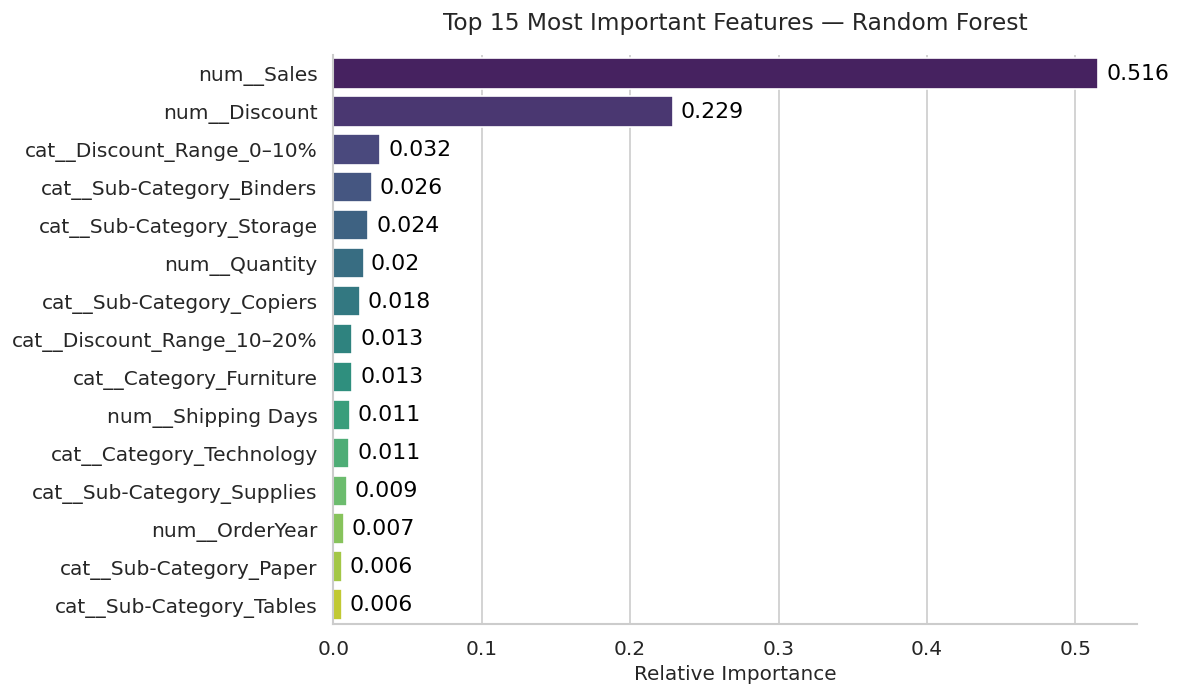

In [161]:
# Plot the top 15 most important features from the optimized Random Forest model

top_n = 15
top_feat = feat_imp.head(top_n)

plt.figure(figsize=(10,6))
barplot = sns.barplot(
    x="Importance",
    y="Feature",
    data=top_feat,
    palette="viridis"
)

# Add numeric labels next to bars
for i, v in enumerate(top_feat["Importance"].round(3)):
    barplot.text(v + 0.005, i, str(v), color='black', va='center')

plt.title(f"Top {top_n} Most Important Features — Random Forest", fontsize=14, pad=15)
plt.xlabel("Relative Importance", fontsize=12)
plt.ylabel("")
plt.tight_layout()
sns.despine()
plt.show()


Here we can see which features had the strongest impact on the Random Forest predictions.
As expected, *Sales* and *Discount* are the top predictors of profit, followed by *Quantity* and *Shipping Days*.
Some specific sub-categories like *Binders* and *Storage* also show up as relevant.
This helps confirm that both pricing and operational variables (like delivery time) matter when explaining profitability


### 2. Performance Comparison — Full vs Selected Features

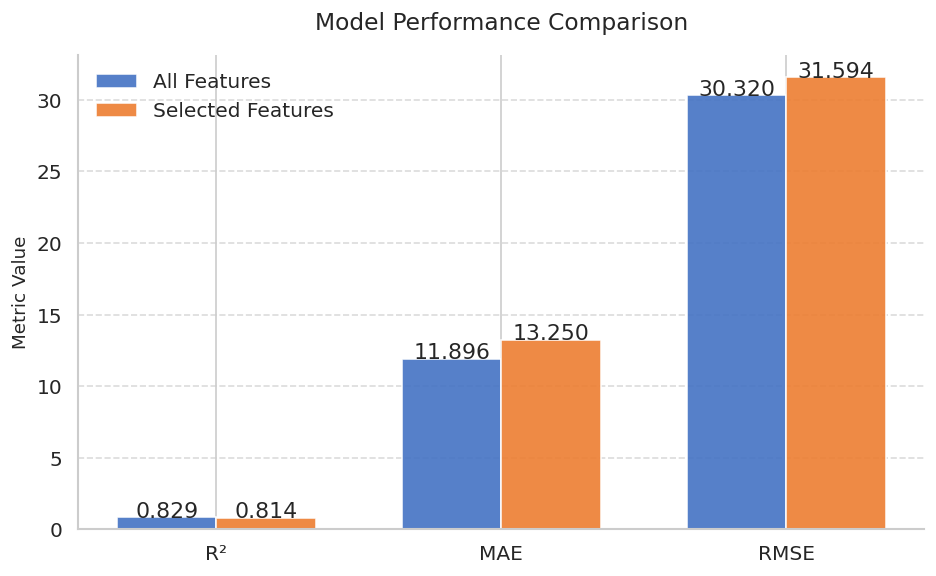

In [162]:
# Compare R², MAE, RMSE between the full model and the reduced model

metrics = ['R²', 'MAE', 'RMSE']
values_full = [r2_full, mae_full, rmse_full]
values_sel = [r2_sel, mae_sel, rmse_sel]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, values_full, width, label='All Features', color='#4472C4', alpha=0.9)
plt.bar(x + width/2, values_sel,  width, label='Selected Features', color='#ED7D31', alpha=0.9)

# Annotate bars with metric values
for i, v in enumerate(values_full):
    plt.text(x[i] - width/2, v + 0.005, f"{v:.3f}", ha='center')
for i, v in enumerate(values_sel):
    plt.text(x[i] + width/2, v + 0.005, f"{v:.3f}", ha='center')

plt.xticks(x, metrics)
plt.ylabel('Metric Value', fontsize=11)
plt.title('Model Performance Comparison', fontsize=14, pad=15)
plt.legend(frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


### 3. Actual vs Predicted Scatter Plot

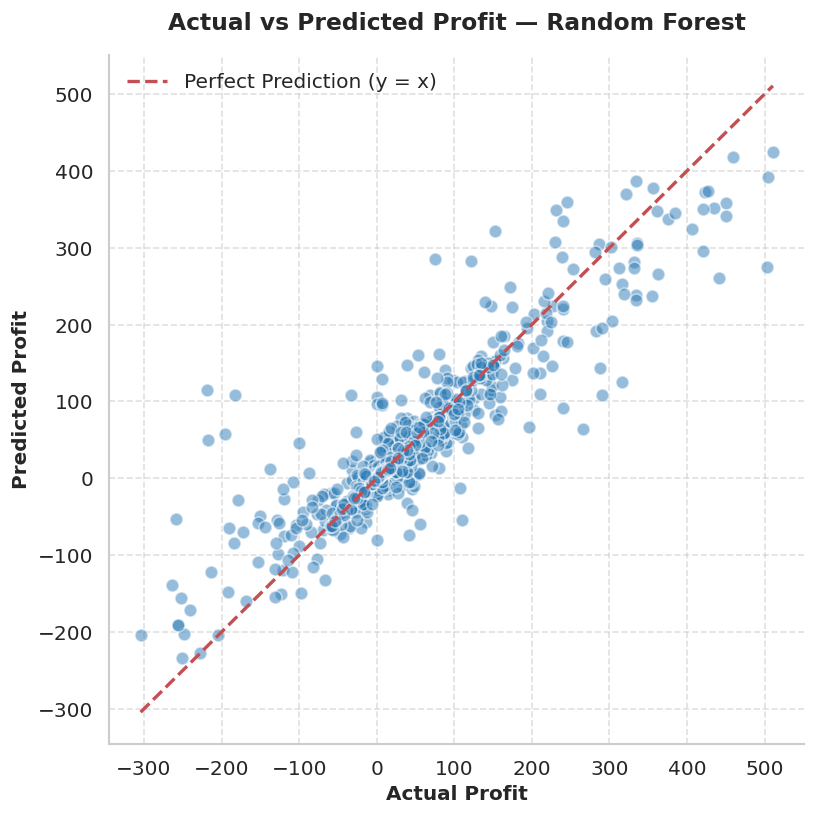

In [163]:
# Visualize how well the model predicts profit values

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_full, alpha=0.5, color='#2C7BB6', edgecolor='white', s=60)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction (y = x)')

plt.title('Actual vs Predicted Profit — Random Forest', fontsize=14, weight='bold', pad=15)
plt.xlabel('Actual Profit', fontsize=12, weight='bold')
plt.ylabel('Predicted Profit', fontsize=12, weight='bold')
plt.legend(frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()


This plot compares the predicted profits from our model to the actual profit values.
If the model was perfect, all points would fall on the diagonal line — and as we can see, most predictions are really close to it.
There are just a few cases where the model underestimates or overestimates profits, usually for extreme values.
Overall, this confirms that the Random Forest model captures the main patterns in the data quite well



### 4. Residuals Plot

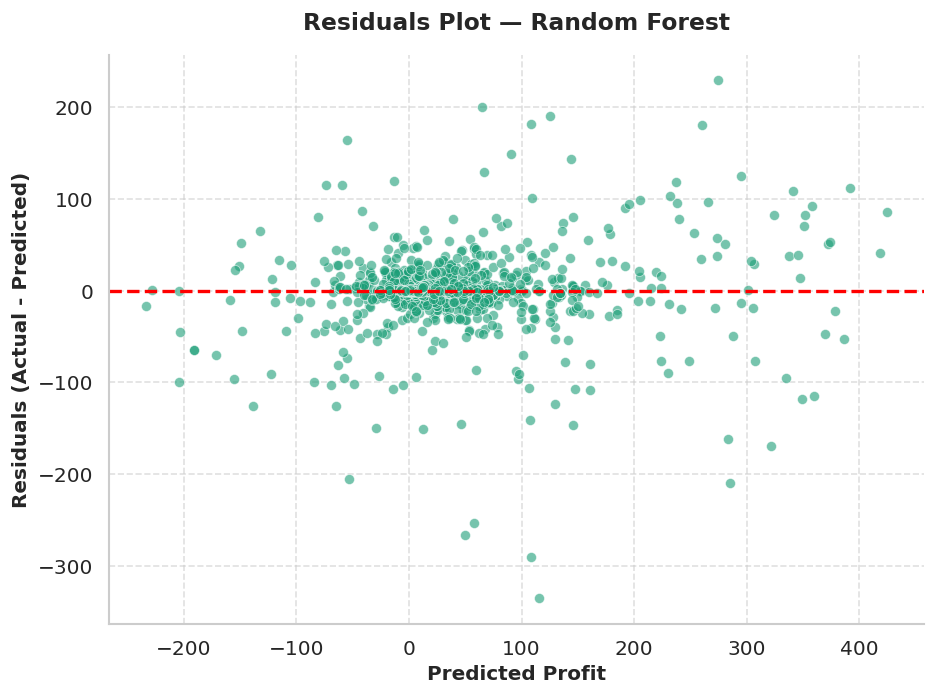

In [164]:
# Check for patterns or bias in prediction errors

residuals = y_test - y_pred_full

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_full, y=residuals, color="#1B9E77", alpha=0.6, edgecolor="white")
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("Residuals Plot — Random Forest", fontsize=14, weight='bold', pad=15)
plt.xlabel("Predicted Profit", fontsize=12, weight='bold')
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()


# Comparison with AutoML (FLAML)

As a final step, we will compare our "winning" model — the optimized Random Forest — with a state-of-the-art AutoML process using the `FLAML` library.

FLAML is a model optimizer: it explores multiple algorithms (such as LightGBM, XGBoost, Random Forest, etc.) and tunes their hyperparameters quickly and efficiently, with the goal of maximizing our $R^2$ score.

This will help us assess how close our manually built model is to the optimal solution found by an automated system.


Dataset in use: 9792 rows and 13 columns.

--- Starting AutoML Search (Budget: 300 sec) ---


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune



--- Search Completed ---

AutoML Results (FLAML)
Winning model: lgbm
Best algorithm: lgbm
R² Test:  0.8269
MAE Test: 12.89
RMSE Test: 30.48


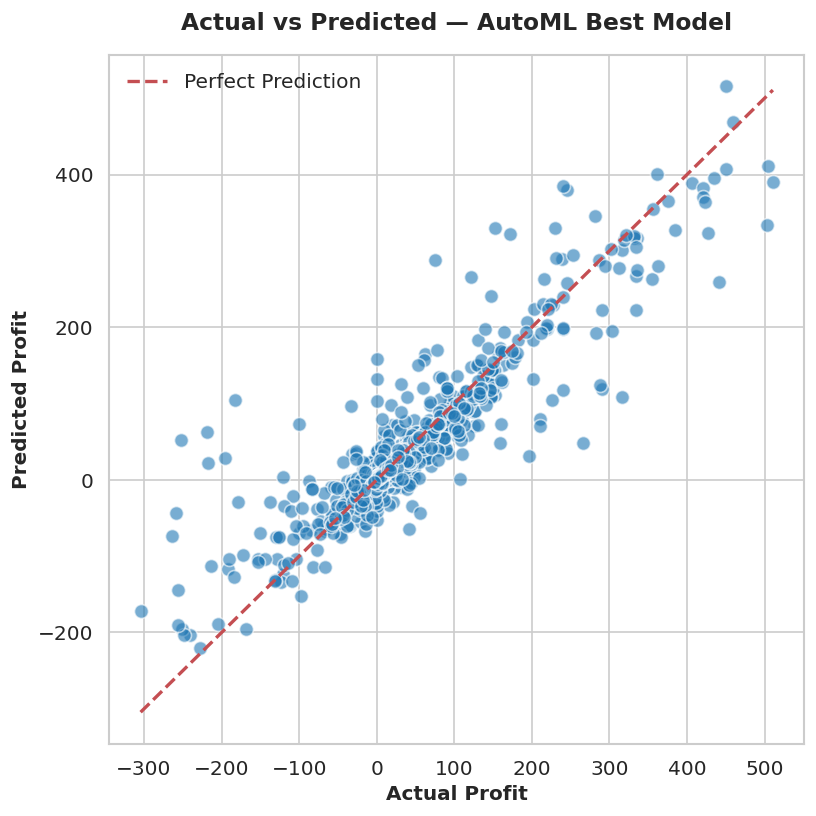

In [165]:
from flaml import AutoML

# Setup
seed = 42
np.random.seed(seed)

# Dataset check
print(f"Dataset in use: {X_clean.shape[0]} rows and {X_clean.shape[1]} columns.")

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=seed
)

# AutoML function
def auto_ml_regression(time_budget_seconds=300):
    automl = AutoML()
    settings = {
        "time_budget": time_budget_seconds,
        "metric": "r2",
        "task": "regression",
        "log_file_name": "flaml_superstore.log",
        "n_jobs": -1,
        "seed": seed,
        "verbose": 1,
    }
    print(f"\n--- Starting AutoML Search (Budget: {time_budget_seconds} sec) ---")
    automl.fit(X_train=X_train, y_train=y_train, **settings)
    print("\n--- Search Completed ---")
    y_pred = automl.predict(X_test)
    return automl, y_pred

# Run AutoML
automl_model, y_pred_automl = auto_ml_regression(time_budget_seconds=300)

# Evaluate results
r2_automl = r2_score(y_test, y_pred_automl)
mae_automl = mean_absolute_error(y_test, y_pred_automl)
rmse_automl = np.sqrt(mean_squared_error(y_test, y_pred_automl))

print("\nAutoML Results (FLAML)")
print("=======================")
print(f"Winning model: {automl_model.best_estimator}")
print(f"Best algorithm: {automl_model.best_estimator}")
print(f"R² Test:  {r2_automl:.4f}")
print(f"MAE Test: {mae_automl:.2f}")
print(f"RMSE Test: {rmse_automl:.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_automl, alpha=0.6, color="#1f77b4", edgecolor="white", s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title("Actual vs Predicted — AutoML Best Model", fontsize=14, weight='bold', pad=15)
plt.xlabel("Actual Profit", fontsize=12, weight='bold')
plt.ylabel("Predicted Profit", fontsize=12, weight='bold')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


## Final Model Comparison — Random Forest vs AutoML

This chart compares the performance of our **Random Forest model optimized via RandomizedSearchCV** with the best model selected by **FLAML AutoML** (LightGBM).  
We evaluate them across three key metrics:

- **R²**: Higher values indicate better fit  
- **MAE**: Lower values indicate fewer average errors  
- **RMSE**: Lower values indicate better error consistency

The side-by-side bars help visualize trade-offs and show how close our semi-automated optimization pipeline comes to the AutoML solution — both in accuracy and robustness.


/tmp/ipython-input-1573727231.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


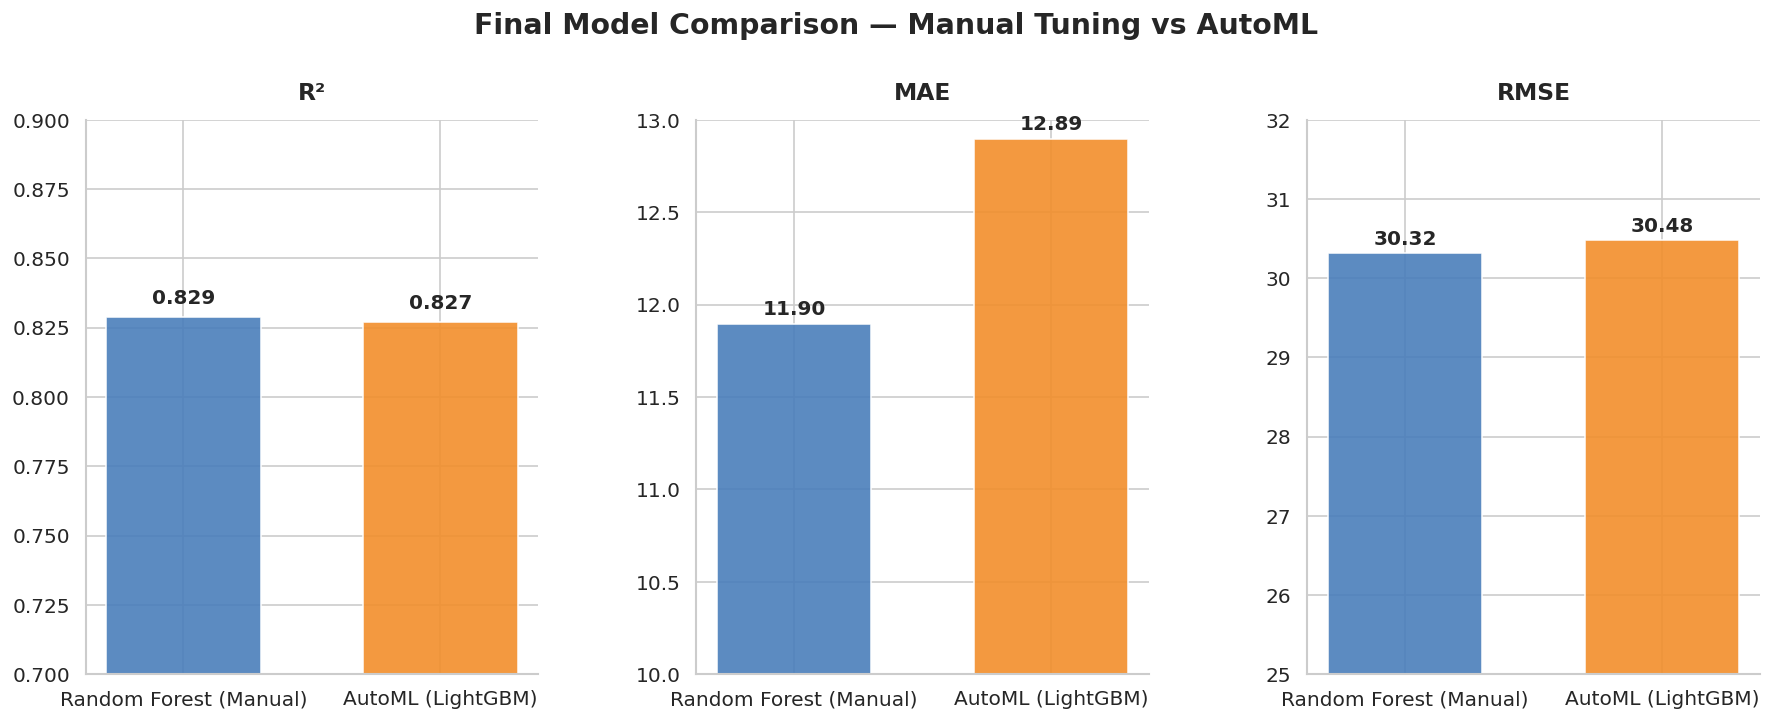

In [723]:
sns.set_style("whitegrid")

models = ['Random Forest', 'AutoML (LightGBM)']
r2_values = [r2_full, r2_automl]
mae_values = [mae_full, mae_automl]
rmse_values = [rmse_full, rmse_automl]

fig, axes = plt.subplots(1, 3, figsize=(18,6), gridspec_kw={'wspace':0.35})

colors = ['#4A7EBB', '#F28E2B']

# R²
axes[0].bar(models, r2_values, color=colors, alpha=0.9, width=0.6)
axes[0].set_title('R²', fontsize=14, fontweight='bold', pad=12)
axes[0].set_ylim(0.7, 0.9)
for i, v in enumerate(r2_values):
    axes[0].text(i, v + 0.005, f"{v:.3f}", ha='center', fontsize=12, weight='bold')

# MAE
axes[1].bar(models, mae_values, color=colors, alpha=0.9, width=0.6)
axes[1].set_title('MAE', fontsize=14, fontweight='bold', pad=12)
axes[1].set_ylim(10, 13)
for i, v in enumerate(mae_values):
    axes[1].text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=12, weight='bold')

# RMSE
axes[2].bar(models, rmse_values, color=colors, alpha=0.9, width=0.6)
axes[2].set_title('RMSE', fontsize=14, fontweight='bold', pad=12)
axes[2].set_ylim(25, 32)
for i, v in enumerate(rmse_values):
    axes[2].text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=12, weight='bold')

# Title
fig.suptitle("Final Model Comparison — Random Froest vs AutoML", fontsize=17, weight='bold', y=1.03)

sns.despine()
plt.tight_layout()
plt.show()



The AutoML phase, executed with FLAML under a 300-second time budget, identified **LightGBM** as the best-performing algorithm for profit prediction.

Compared to the **Random Forest model optimized via RandomizedSearchCV**, the AutoML solution achieved a **comparable R²** (0.827 vs 0.829), with slightly **higher MAE** (12.89 vs 11.90) and **similar RMSE** (30.48 vs 30.32).

This confirms that the manual pipeline — including preprocessing and hyperparameter tuning — was already highly effective, while FLAML demonstrated its ability to rapidly identify competitive models with minimal intervention.
